In [1]:
%config completer.use_jedi = False

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Mounting our google drive on google colab to access our data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset
filepath = '/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_2007_2014.csv'
LoanDataset=pd.read_csv(filepath, index_col= 0)#.reset_index(drop=True)

#create a copy of original dataset so that orginal dataframe is not disturbed
Loan_df=LoanDataset.copy()

#Check the sample data in our df
Loan_df.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check the info of the dataframe
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# PRE-PROCESING

#### Data Cleaning

In [5]:
#check the emp-length column unique values
Loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
#replace/remove the extra characters/words
Loan_df['emp_length_int']=Loan_df['emp_length'].str.replace('[<+ years year]','')

#convert it into numrical format and check the type of emp_length_int
Loan_df['emp_length_int'] = pd.to_numeric(Loan_df['emp_length_int'])
type(Loan_df['emp_length_int'][0])

numpy.float64

In [7]:
Loan_df['emp_length_int'].unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [8]:
#print the dataframe
Loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [9]:
#check the unique values of term column
Loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
#do all the necesaary replacements to convert into numeric
Loan_df['term_int']=Loan_df['term'].str.replace('[ months]','')

In [11]:
#convert it into numrical format & check the type
Loan_df['term_int']= pd.to_numeric(Loan_df['term_int'])

type(Loan_df['term_int'][0])

numpy.int64

In [12]:
Loan_df['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [13]:
#check the values for called earliest_cr_line column- the month the borrower's has been assigned the loan
Loan_df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [14]:
#convert into datetime format and check the values
Loan_df['earliest_cr_line_date']=pd.to_datetime(Loan_df['earliest_cr_line'], format='%b-%y')
Loan_df['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [15]:
from datetime import date

#get the total number of days from current date i.e present date
pd.to_datetime(date.today())-Loan_df['earliest_cr_line_date']

0        14110 days
1         8907 days
2         7962 days
3        10062 days
4        10093 days
            ...    
466280    7446 days
466281    9576 days
466282    7932 days
466283    7505 days
466284    8601 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [16]:
#convert these days into months i.e converting days into months
Loan_df['mths_since_earliest_cr_line'] = round(
    pd.to_numeric((pd.to_datetime(date.today())-Loan_df['earliest_cr_line_date'])/np.timedelta64(1,'M'))
)

In [17]:
#check the basic statistics of 'mths_since_earliest_cr_line'
Loan_df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        308.482430
std          93.974829
min        -543.000000
25%         252.000000
50%         294.000000
75%         354.000000
max         656.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
#check the dataframe for column that have negitive months which is not possible
Loan_df.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Loan_df['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-468.0
1770,Sep-68,2068-09-01,-540.0
2799,Sep-64,2064-09-01,-492.0
3282,Sep-67,2067-09-01,-528.0
3359,Feb-65,2065-02-01,-497.0
...,...,...,...
464003,Jan-68,2068-01-01,-532.0
464260,Jul-66,2066-07-01,-514.0
465100,Oct-67,2067-10-01,-529.0
465500,Sep-67,2067-09-01,-528.0


Upon analyzing the negative values in column 'mths_since_earliest_cr_line' we can see that for those data points dates are provided far in the future. In this scenario we get an info from business as per what can be done here.
As of now we will replace t he negative values with the maximumm no. of months since earliest credit line was opened(considering that it was supposed to be in 1990s and not 2000s)

In [19]:
#replace all the negitive values  with the max months value
Loan_df['mths_since_earliest_cr_line'][Loan_df['mths_since_earliest_cr_line'] < 0 ]= Loan_df['mths_since_earliest_cr_line'].max()

In [20]:
#again check the basic stats so that no months are negitive
Loan_df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        311.385374
std          86.460310
min         142.000000
25%         253.000000
50%         295.000000
75%         354.000000
max         656.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
#chekc the issue_d column
Loan_df['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [22]:
#convert into date_time format
Loan_df['issue_date']= pd.to_datetime(Loan_df['issue_d'], format='%b-%y')

In [23]:
#convert days to months
Loan_df['months_since_issue_date']=round(
    pd.to_numeric((pd.to_datetime(date.today())-Loan_df['issue_date'])/np.timedelta64(1,'M'))
)

In [24]:
#check the basic stats
Loan_df['months_since_issue_date'].describe()

count    466285.000000
mean        120.255187
std          14.340154
min         105.000000
25%         110.000000
50%         116.000000
75%         126.000000
max         195.000000
Name: months_since_issue_date, dtype: float64

#### Preprocessing Categorical Data

In [25]:
#Get the dummies value for the column 'grade',,,apply a (prefix='grade') and (prefix_sep=":")
pd.get_dummies(Loan_df['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [26]:
#Similarly apply the dummy creation step for 'grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status' in one list_comprehension
Load_dumies_Data=[pd.get_dummies(Loan_df['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Loan_df['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Loan_df['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Loan_df['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Loan_df['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Loan_df['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Loan_df['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Loan_df['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]



Load_dumies_Data[1].head(5)


,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,...,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#concat all elements in the list and create a dataframe
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

#check the dummy var dataframe
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#conact this dummy var dataframe with the original Loan_df dataframe
Loan_df=pd.concat([Loan_df,Load_dumies_Data], axis=1)

In [29]:
#check the column names
Loan_df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

##### Missing Values imputation

In [30]:
pd.options.display.max_rows = None

#check for missing values and print the sum of all null values of all columns
Loan_df.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [31]:
#CHeck the null values for Total revenue high credit limit column and
#replace them with vlaues in funded_amount column in our data set
Loan_df['total_rev_hi_lim'].fillna(Loan_df['funded_amnt'], inplace = True)

#Check the null values post filling
Loan_df['total_rev_hi_lim'].isna().sum()

0

In [32]:
pd.options.display.max_rows =100

In [33]:
#similarly fill the 'annual_inc' null values with mean value of 'annual_inc' column
Loan_df['annual_inc'].fillna(Loan_df['annual_inc'].mean(), inplace = True)

#Check the null values post filling
Loan_df['annual_inc'].isnull().sum()

0

In [34]:
#fill all null values in column 'mths_since_earliest_cr_line',acc_now_delinq, total_acc,
# pub_rec, open_acc, inq_last_6mths, delinq_2yrs,emp_length_int with '0'
Loan_df['mths_since_earliest_cr_line'].fillna('0', inplace = True)
Loan_df['acc_now_delinq'].fillna('0', inplace = True)
Loan_df['total_acc'].fillna('0', inplace = True)
Loan_df['pub_rec'].fillna('0',inplace=True)
Loan_df['open_acc'].fillna('0',inplace=True)
Loan_df['inq_last_6mths'].fillna('0',inplace=True)
Loan_df['delinq_2yrs'].fillna('0',inplace=True)
Loan_df['emp_length_int'].fillna('0',inplace=True)

In [35]:
#check the null values in the dataset again
Loan_df['inq_last_6mths'].isnull().sum()

0

##### PD(PROBABLITY OF DEFAULT)
- analyzing the probability that the customer who has taken the loan will not pay the loan on time

Building the Weight of expetency values

In [36]:
#check the unique values in our final output column i.e 'loan_status'
Loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [37]:
#chekc the value_counts for loan_status
Loan_df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [38]:
#check the percentage of distribution
Loan_df['loan_status'].value_counts()/Loan_df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Binary encoding of our target variable replacing 'Fully paid','Current',
'Does not meet the credit policy. Status:Fully Paid, Late (16-30 days)' with 1 and rest with 0

In [39]:
#Binary encoding of our target variable
Loan_df['good_bad']=np.where(Loan_df['loan_status'].isin(
    ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
),0,1)

In [40]:
X = Loan_df.drop('good_bad', axis = 1)
y = Loan_df['good_bad']

### DATA PREPARATION

In [44]:
#Data prepartion to build the score-card:
df_inputs_prepr = X
df_targets_prepr = y

In [45]:
#check the unique values for 'grade' column
df_inputs_prepr['grade'].unique()

array(['B', 'C', 'F', 'A', 'D', 'E', 'G'], dtype=object)

In [46]:
#concat grade with df_target_prepr col and create a dataframe
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

,grade,good_bad
403678,B,1
241492,C,1
15864,C,0
320277,C,1
299829,B,1
...,...,...
73349,G,1
371403,E,1
312201,A,1
267336,C,1


In [47]:
#check number of records in each grade
records_per_grade = df1.groupby('grade', as_index = False).count()
records_per_grade

,grade,good_bad
0,A,59962
1,B,109582
2,C,100255
3,D,61390
4,E,28602
5,F,10581
6,G,2656


In [48]:
#get the mean of the number of records i.e here we will get only for good loans only that has binary value as '1'
good_loan_per_grade = df1.groupby('grade',as_index=False).mean()

In [49]:
#create a dataframe that has the number of records and mean records for grade
df1=pd.concat([df1.groupby('grade',as_index=False).count(),
             df1.groupby('grade',as_index=False).mean()], join = 'inner' ,axis=1)

In [50]:
#print df1
df1

,grade,good_bad,grade,good_bad
0,A,59962,A,0.961759
1,B,109582,B,0.921109
2,C,100255,C,0.885093
3,D,61390,D,0.846506
4,E,28602,E,0.805958
5,F,10581,F,0.762026
6,G,2656,G,0.721009


In [51]:
#remove the grade column as it is twice
df1 = df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59962,0.961759
1,B,109582,0.921109
2,C,100255,0.885093
3,D,61390,0.846506
4,E,28602,0.805958
5,F,10581,0.762026
6,G,2656,0.721009


In [52]:
#replacing the column names to make it more representable
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [53]:
df1


,grade,n_obs,prop_good
0,A,59962,0.961759
1,B,109582,0.921109
2,C,100255,0.885093
3,D,61390,0.846506
4,E,28602,0.805958
5,F,10581,0.762026
6,G,2656,0.721009


In [54]:
#get the proportion of n_obs- no. of observations for each grade/total no. of observations
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [55]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59962,0.961759,0.160744
1,B,109582,0.921109,0.293763
2,C,100255,0.885093,0.268760
3,D,61390,0.846506,0.164572
4,E,28602,0.805958,0.076675
5,F,10581,0.762026,0.028365
6,G,2656,0.721009,0.007120


In [56]:
#calculating the number of good varriables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59962,0.961759,0.160744,57669.0,2293.0
1,B,109582,0.921109,0.293763,100937.0,8645.0
2,C,100255,0.885093,0.268760,88735.0,11520.0
3,D,61390,0.846506,0.164572,51967.0,9423.0
4,E,28602,0.805958,0.076675,23052.0,5550.0
5,F,10581,0.762026,0.028365,8063.0,2518.0
6,G,2656,0.721009,0.007120,1915.0,741.0


In [57]:
#check the density of good and bad variables
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900
1,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013
2,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354
4,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700
5,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577
6,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230


In [58]:
#calculate the Weight of Evidence(WOE) = In(% of good-events ➗ % of bad-events)

df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859
1,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515
2,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455
4,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955
5,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821
6,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472


In [59]:
#reset the index of the df1 dataframe and sort the values according to WoE
df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859


In [60]:
#calculate the (absolulute) difference for prop_good and WoE columns(for each row) in order to evaluate IV:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [61]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343


In [62]:
#calculate the IV:implied volatility(which will tell us how much we can rely on WOE)

df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN,2.010485
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348,2.010485
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134,2.010485
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501,2.010485
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114,2.010485
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946,2.010485
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343,2.010485


In [63]:
#Creating a function for the the data prepation steps to calculate WoE & IV

def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[discrete_variable_name,'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    #df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['WoE'] = np.where(df['prop_n_bad'] != 0,np.log(df['prop_n_good']/df['prop_n_bad']),0)  #handle divide by 0 values
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [64]:
#applying the function on 'grade' column:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN,2.010485
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348,2.010485
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134,2.010485
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501,2.010485
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114,2.010485
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946,2.010485
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343,2.010485


##### Visualizing Results

In [65]:
#import the visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [66]:
#function for plotting of WoE:

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

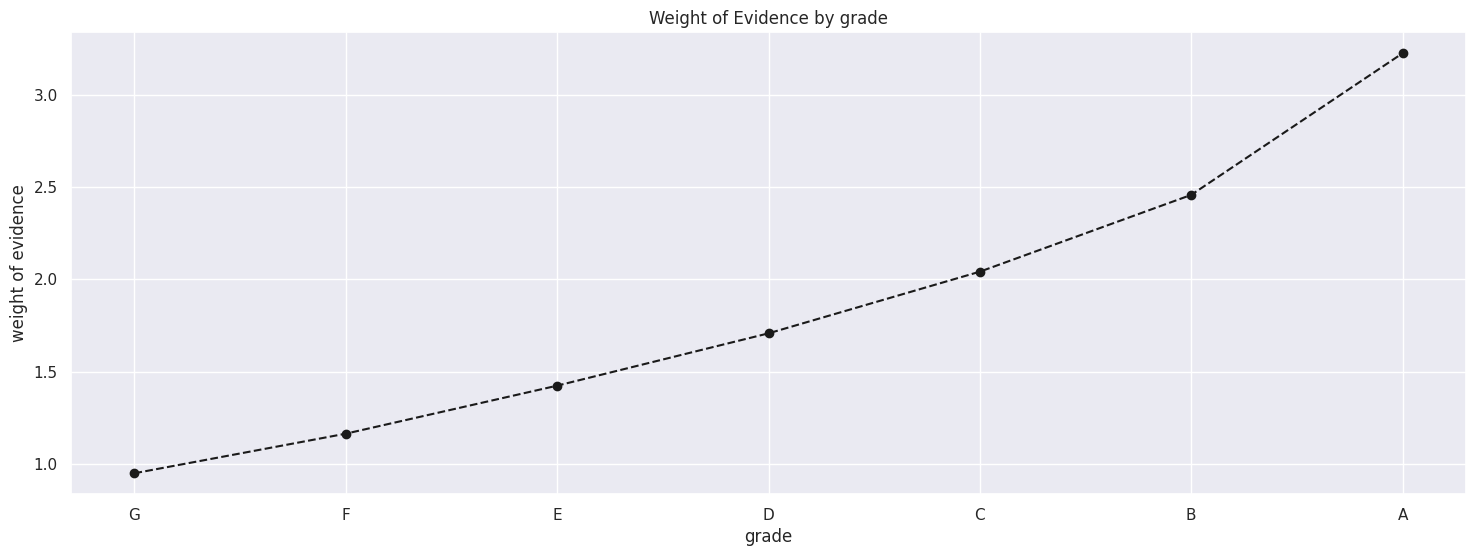

In [67]:
#pass the dataframe into the plot_by_woe function
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [68]:
#Check the WoE for 'home_ownership' and visualize the result using woe plot
df_temp_ho = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp_ho

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,0.000000,NaN,NaN,1.855124
1,OTHER,145,0.800000,0.000389,116.0,29.0,0.000349,0.000087,1.386294,0.200000,1.386294,1.855124
2,RENT,150727,0.874183,0.404064,131763.0,18964.0,0.396473,0.057062,1.938462,0.074183,0.552168,1.855124
3,NONE,40,0.875000,0.000107,35.0,5.0,0.000105,0.000015,1.945910,0.000817,0.007448,1.855124
4,OWN,33522,0.891444,0.089865,29883.0,3639.0,0.089917,0.010950,2.105581,0.016444,0.159671,1.855124
5,MORTGAGE,188593,0.904275,0.505573,170540.0,18053.0,0.513152,0.054321,2.245658,0.012831,0.140077,1.855124


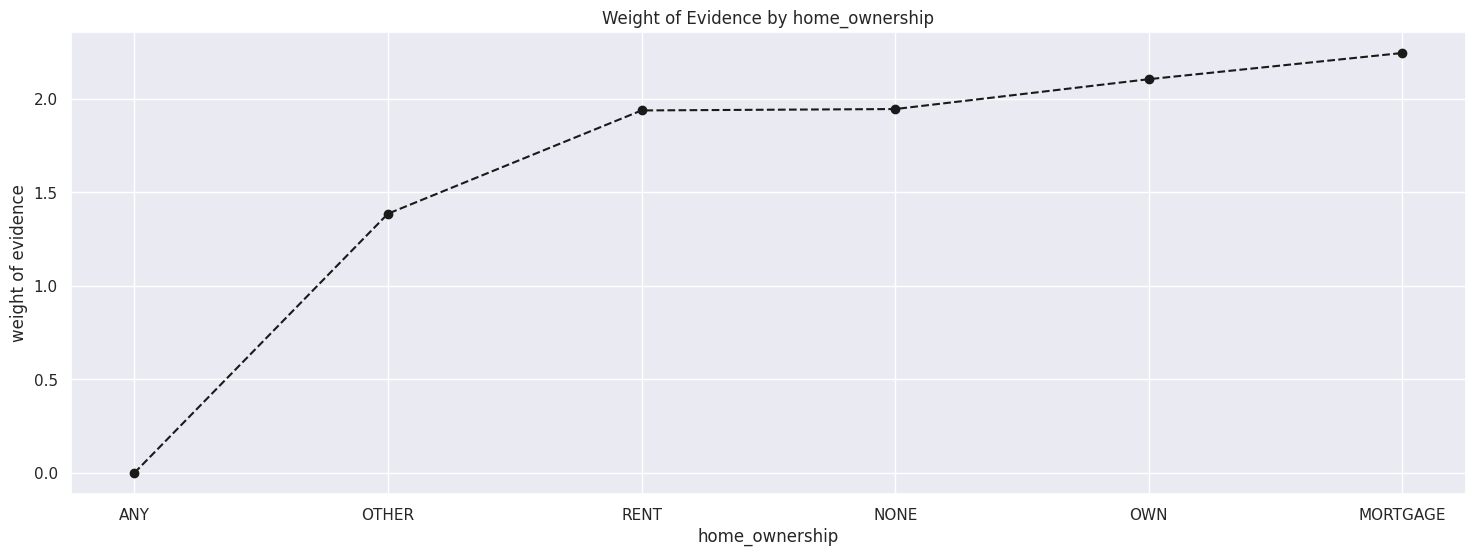

In [69]:
#plot the woe for 'home_ownersip'
plot_by_woe(df_temp_ho)

In [70]:
#add the binary values of values 'RENT','OTHER','NONE','ANY' as they have low WoE values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [71]:
#check the unique values in addr_state(df_inputs_prepr = X_train)
df_inputs_prepr['addr_state'].unique()

array(['OK', 'CA', 'VA', 'OH', 'NC', 'MN', 'FL', 'TX', 'AL', 'NY', 'KY',
       'MI', 'GA', 'WA', 'NV', 'PA', 'SC', 'MD', 'SD', 'TN', 'NJ', 'NH',
       'IL', 'WI', 'AZ', 'MA', 'VT', 'RI', 'HI', 'LA', 'AK', 'MS', 'MT',
       'NM', 'KS', 'IN', 'CT', 'DE', 'OR', 'AR', 'MO', 'DC', 'CO', 'UT',
       'WV', 'WY', 'NE', 'ID', 'IA', 'ME'], dtype=object)

In [72]:
#apply the function woe_discrete on 'addr_state'
df_temp_as = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp_as.head(5)

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.384615,0.000035,5.0,8.0,0.000015,0.000024,-0.470004,NaN,NaN,1.850527
1,ME,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,0.000000,0.615385,0.470004,1.850527
2,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000009,1.203973,0.230769,1.203973,1.850527
3,NV,5269,0.865060,0.014125,4558.0,711.0,0.013715,0.002139,1.857967,0.095829,0.653994,1.850527
4,HI,2005,0.868828,0.005375,1742.0,263.0,0.005242,0.000791,1.890635,0.003768,0.032668,1.850527


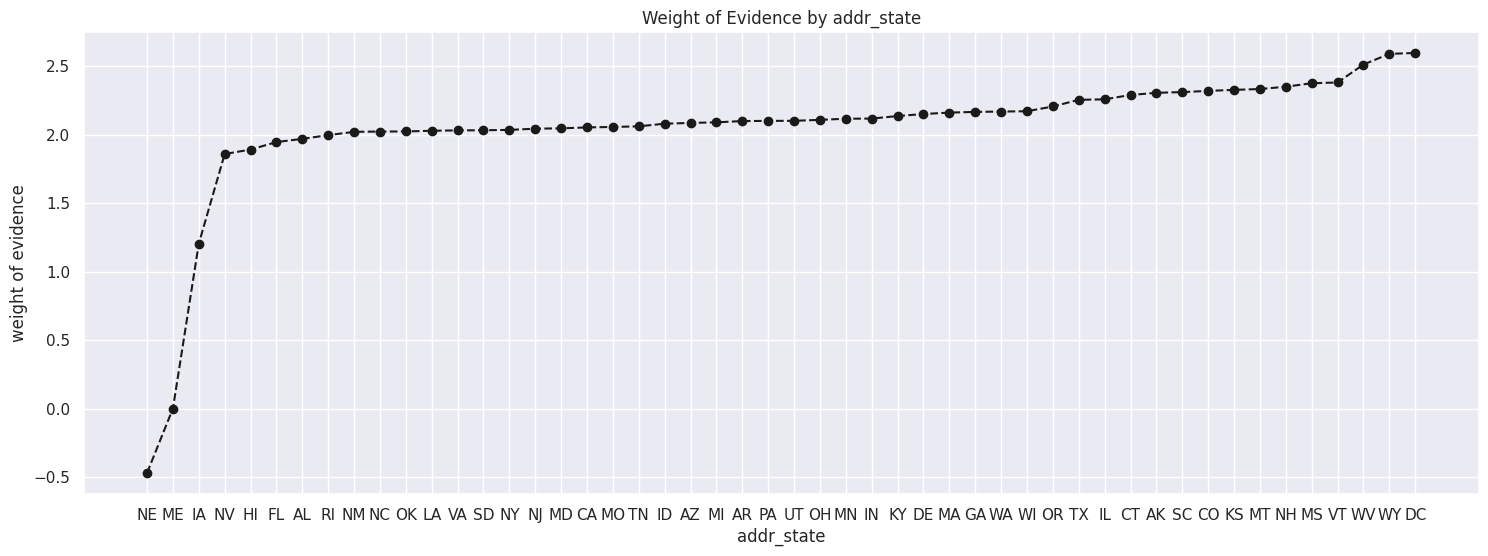

In [73]:
#plot the woe_plot
plot_by_woe(df_temp_as)

In [74]:
#adding the state 'ND' if it is not present in columns and make it zero if not present
# if['addr_state:ND'] in df_inputs_prepr.columns.values:
#     pass
# else:
#     df_inputs_prepr['addr_state:ND']=0

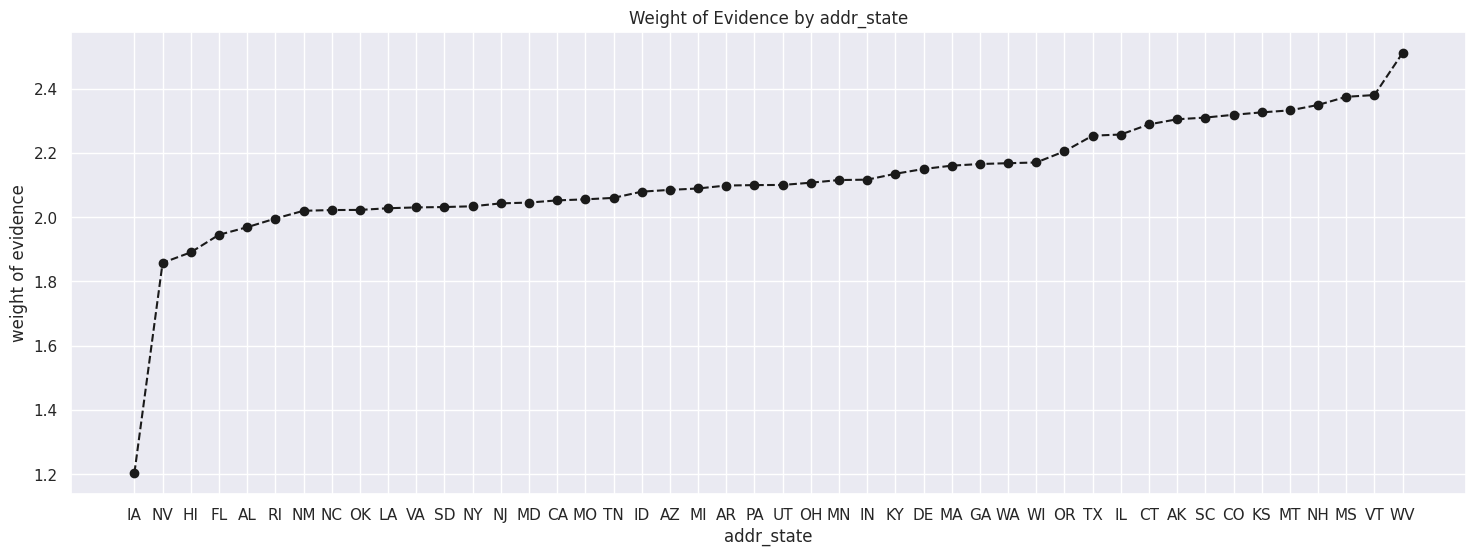

In [75]:
#plot the woe_plot from 2nd row- IA onwards for which we have significan WoE value
plot_by_woe(df_temp_as.iloc[2:-2,:])

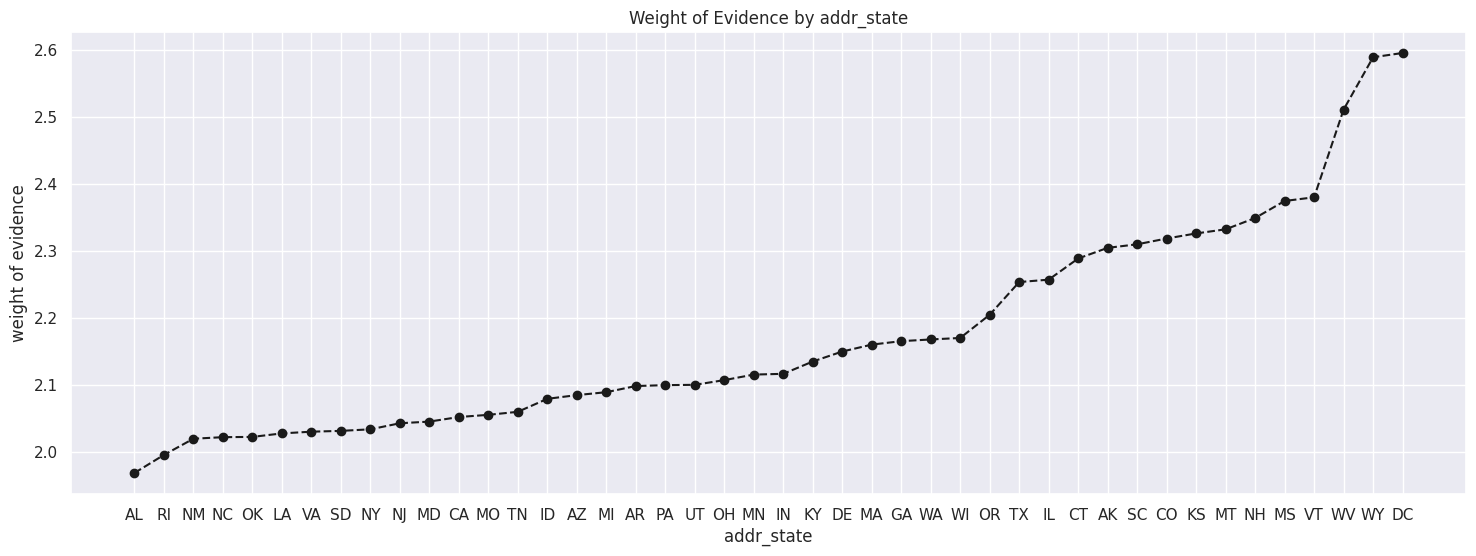

In [76]:
#woe_plot for values whose WoE values differs at large to get the clear picture
plot_by_woe(df_temp_as.iloc[6:,:])

In [77]:
# states_list = df_temp_as[df_temp_as['binned_values']== 16]['addr_state']#.astype(str))#transform(lambda x : '_'.join(x))
# state_col = ('addr_state:'+ (df_temp_as[df_temp_as['binned_values']== 16]['addr_state']).astype(str)).tolist()
# col_name = 'addr_state_'+ states_list.str.cat(sep='_')
# # len(state_col)
# # for state in np.arange(len(state_col)):
# #     val += [df_inputs_prepr[state_col]]

# #state_col
# df2 = pd.DataFrame()
# df2[col_name] = df_inputs_prepr[state_col].sum(axis = 1)

we have multiple states columns with different WoE values, let's make it simple and consolidate them as per similar WoE values by using the approach of binning

In [78]:
#create 10 bins
bins = np.linspace(df_temp_as['WoE'].min(),df_temp_as['WoE'].max(),20)
df_temp_as['binned_values'] = np.digitize(df_temp_as['WoE'].values, bins=bins)

#group states with similar WoE values
for i in np.arange(1,21):
    if(not(df_temp_as[df_temp_as['binned_values']== i].empty)):
        #display(i) #checkpoint
        states_list = pd.Series()
        all_col_name = []
        state_col =[]
        states_list = df_temp_as[df_temp_as['binned_values']== i]['addr_state'] #series object
        all_col_name = 'addr_state_'+ states_list.str.cat(sep='_')
        state_col = ('addr_state:'+ (df_temp_as[df_temp_as['binned_values']== i]['addr_state']).astype(str)).tolist()
        df_inputs_prepr[all_col_name] = df_inputs_prepr[state_col].sum(axis = 1)

df_inputs_prepr.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership:RENT_OTHER_NONE_ANY,addr_state_NE,addr_state_ME,addr_state_IA,addr_state_NV_HI_FL,addr_state_AL_RI_NM_NC_OK_LA_VA_SD_NY_NJ_MD_CA_MO_TN_ID_AZ_MI_AR_PA_UT_OH,addr_state_MN_IN_KY_DE_MA_GA_WA_WI_OR_TX_IL,addr_state_CT_AK_SC_CO_KS_MT_NH_MS_VT,addr_state_WV_WY,addr_state_DC
403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,B3,...,0,0,0,0,0,1,0,0,0,0
241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,C1,...,1,0,0,0,0,1,0,0,0,0
15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,C2,...,1,0,0,0,0,1,0,0,0,0
320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,C3,...,1,0,0,0,0,1,0,0,0,0
299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,B4,...,0,0,0,0,0,1,0,0,0,0
71921,8365878,10107956,15000,15000,14950.0,36 months,9.99,483.94,B,B1,...,0,0,0,0,0,0,1,0,0,0
375016,18254301,20397010,5000,5000,5000.0,36 months,10.99,163.67,B,B3,...,1,0,0,0,1,0,0,0,0,0
172049,3147852,3860220,11100,11100,11100.0,36 months,13.11,374.60,B,B4,...,1,0,0,0,0,0,1,0,0,0
231971,37600985,40363816,33700,33700,33675.0,60 months,24.99,988.95,F,F4,...,1,0,0,0,0,1,0,0,0,0
335590,22344522,24667077,4375,4375,4375.0,36 months,10.15,141.48,B,B2,...,1,0,0,0,0,1,0,0,0,0


In the above step we automated the process of grouping different states based on their WoE values, whereas in below step we have approaced it manual analysis

In [79]:
#alternatively, we can simply add the WoE values for states with similar WoE values by checking manually


df_inputs_prepr['addr_state:ME_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'],
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [80]:
#check the unique values for verification_status column
df_inputs_prepr['verification_status'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [81]:
#apply the woe_discrete function for verification_status
df_temp_vs = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp_vs

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134465,0.873238,0.360469,117420.0,17045.0,0.353315,0.051288,1.929900,NaN,NaN,1.854416
1,Source Verified,119800,0.895618,0.321156,107295.0,12505.0,0.322849,0.037627,2.149453,0.022379,0.219553,1.854416
2,Not Verified,118763,0.906200,0.318376,107623.0,11140.0,0.323836,0.033520,2.268092,0.010582,0.118639,1.854416


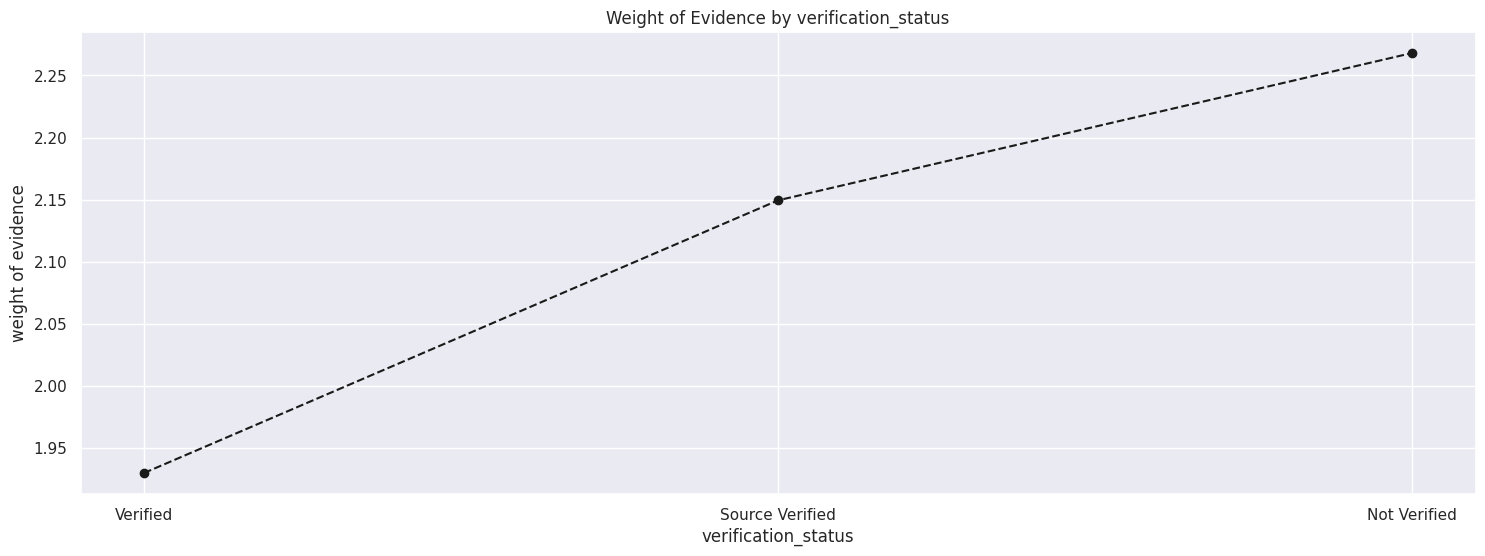

In [82]:
#plot the woe plot
plot_by_woe(df_temp_vs)

from above analysis for Verification status, WoE for 'Not Verified' is high which means that the person whose source is not verified is paying the loan on time.

In [83]:
#check the unique values for 'purpose' column
df_inputs_prepr['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'medical', 'small_business',
       'home_improvement', 'major_purchase', 'other', 'moving', 'car',
       'educational', 'vacation', 'renewable_energy', 'wedding', 'house'],
      dtype=object)

In [84]:
#apply the woe_discrete on 'purpose' column
df_temp_purpose = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp_purpose.head(10)

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,329,0.784195,0.000882,258.0,71.0,0.000776,0.000214,1.290280,NaN,NaN,1.862323
1,small_business,5614,0.785892,0.015050,4412.0,1202.0,0.013276,0.003617,1.300341,0.001698,0.010062,1.862323
2,renewable_energy,276,0.840580,0.000740,232.0,44.0,0.000698,0.000132,1.662548,0.054687,0.362206,1.862323
3,moving,2407,0.850436,0.006453,2047.0,360.0,0.006159,0.001083,1.738027,0.009857,0.075479,1.862323
4,house,1815,0.861157,0.004866,1563.0,252.0,0.004703,0.000758,1.824933,0.010721,0.086907,1.862323
5,other,18968,0.864772,0.050849,16403.0,2565.0,0.049356,0.007718,1.855506,0.003615,0.030573,1.862323
6,medical,3671,0.868428,0.009841,3188.0,483.0,0.009593,0.001453,1.887132,0.003656,0.031627,1.862323
7,vacation,1970,0.882234,0.005281,1738.0,232.0,0.005230,0.000698,2.013753,0.013805,0.126621,1.862323
8,wedding,1887,0.882883,0.005059,1666.0,221.0,0.005013,0.000665,2.020018,0.000649,0.006265,1.862323
9,debt_consolidation,219325,0.886734,0.587959,194483.0,24842.0,0.585196,0.074749,2.057809,0.003851,0.037791,1.862323


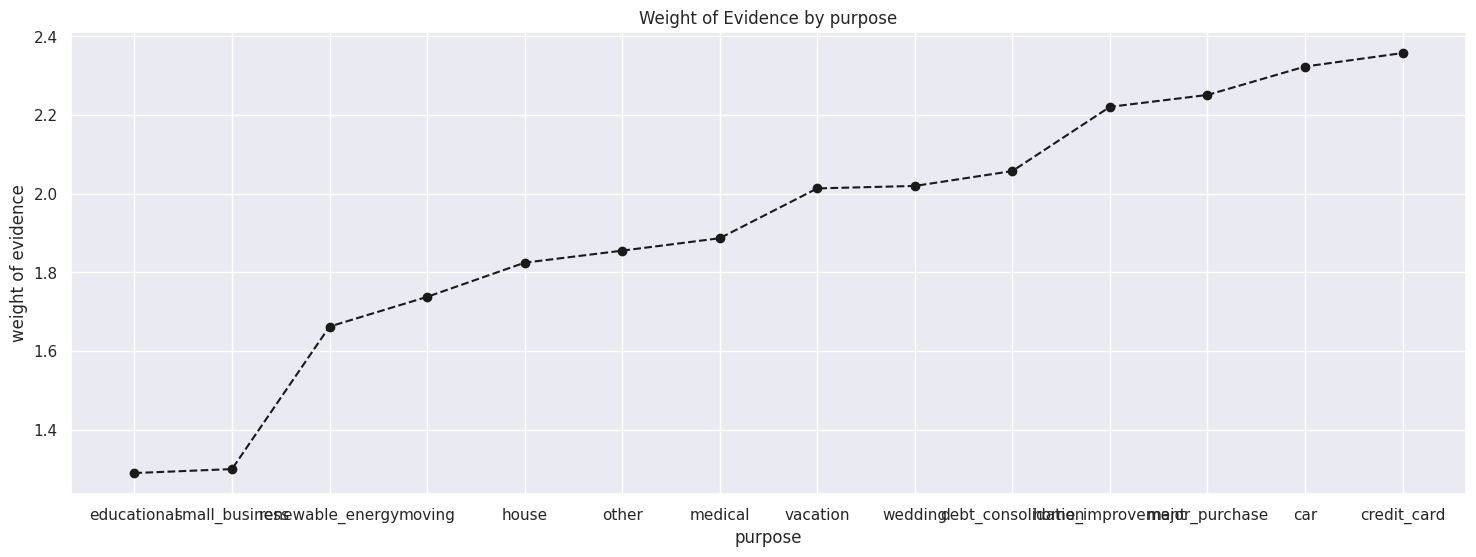

In [85]:
#plot the woe plot
plot_by_woe(df_temp_purpose)

In [86]:
#converting the purpose column into binary encoded,
#consolidated into 2 columns based on woe values that are close to each other

df_inputs_prepr['purpose:educ_sm_b_ren_en_mov_house_other_med'] = sum(
                                              [df_inputs_prepr['purpose:small_business'],
                                               df_inputs_prepr['purpose:educational'],
                                               df_inputs_prepr['purpose:renewable_energy'],
                                               df_inputs_prepr['purpose:moving'],
          -                                    df_inputs_prepr['purpose:house'],
                                               df_inputs_prepr['purpose:other'],
                                               df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:vac_wedd_debt_home_imp_major_pur_car_cc'] = sum(
                                             [df_inputs_prepr['purpose:wedding'],
                                              df_inputs_prepr['purpose:vacation'],
                                              df_inputs_prepr['purpose:debt_consolidation'],
                                              df_inputs_prepr['purpose:home_improvement'],
                                              df_inputs_prepr['purpose:major_purchase'],
                                              df_inputs_prepr['purpose:car'],
                                              df_inputs_prepr['purpose:credit_card']])

#Check the df_inputs_prepr dataframe
df_inputs_prepr.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ_sm_b_ren_en_mov_house_other_med,purpose:vac_wedd_debt_home_imp_major_pur_car_cc
403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,B3,...,0,0,0,0,0,0,0,0,0,1
241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,C1,...,0,0,0,0,0,0,0,0,0,1
15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,C2,...,0,0,0,0,0,0,0,0,0,1
320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,C3,...,0,1,0,0,0,0,0,0,0,1
299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,B4,...,0,0,0,0,0,0,0,0,0,1
71921,8365878,10107956,15000,15000,14950.0,36 months,9.99,483.94,B,B1,...,0,1,0,0,0,0,0,0,0,1
375016,18254301,20397010,5000,5000,5000.0,36 months,10.99,163.67,B,B3,...,0,0,0,0,0,0,0,0,0,1
172049,3147852,3860220,11100,11100,11100.0,36 months,13.11,374.60,B,B4,...,0,0,0,0,0,0,0,0,0,1
231971,37600985,40363816,33700,33700,33675.0,60 months,24.99,988.95,F,F4,...,0,0,0,0,0,0,0,0,0,1
335590,22344522,24667077,4375,4375,4375.0,36 months,10.15,141.48,B,B2,...,0,0,0,0,0,0,0,0,0,1


In [87]:
#check the 'initial_list_status' unique values
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [88]:
#apply the woe_discrete function on 'initial_list_status'
df_temp_ins = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp_ins.head(10)

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242528,0.880018,0.65016,213429.0,29099.0,0.642205,0.087558,1.99260,NaN,NaN,1.856984
1,w,130500,0.911180,0.34984,118909.0,11591.0,0.357795,0.034877,2.32813,0.031162,0.335529,1.856984


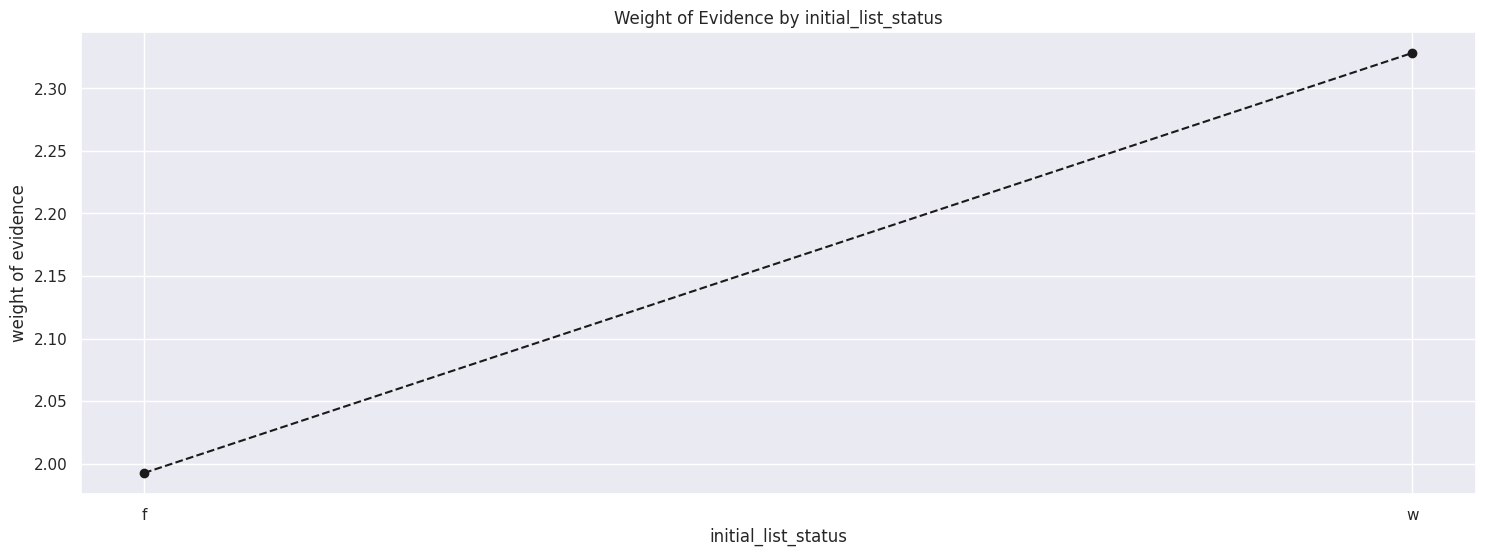

In [89]:
#plot the woe plot
plot_by_woe(df_temp_ins)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [90]:
#Earlier we defined a function for categorical values
import math
#Now, this is the function for preprocessing of continuous variables

def woe_continuous(df,continuous_variable_name,good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[continuous_variable_name,'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    #df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['WoE'] = np.where(((df['prop_n_bad'].round(decimals=6) != 0.000000) & (df['prop_n_good'].round(decimals=6) != 0.000000)),np.log(df['prop_n_good']/df['prop_n_bad']),0)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df



(df.round(decimals=5) != 0.000000) condition is added to deal with float values as we have values such as 0.0034 which upon rounding turns to 0.0

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [91]:
#check the 'term_int' unique values
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [92]:
#apply the woe_continuous function on 'term_init' column
df_temp_term_init = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp_term_init.head(10)

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270441,0.903214,0.724988,244266.0,26175.0,0.734993,0.078760,2.233453,NaN,NaN,1.86472
1,60,102587,0.858510,0.275012,88072.0,14515.0,0.265007,0.043675,1.802972,0.044703,0.430481,1.86472


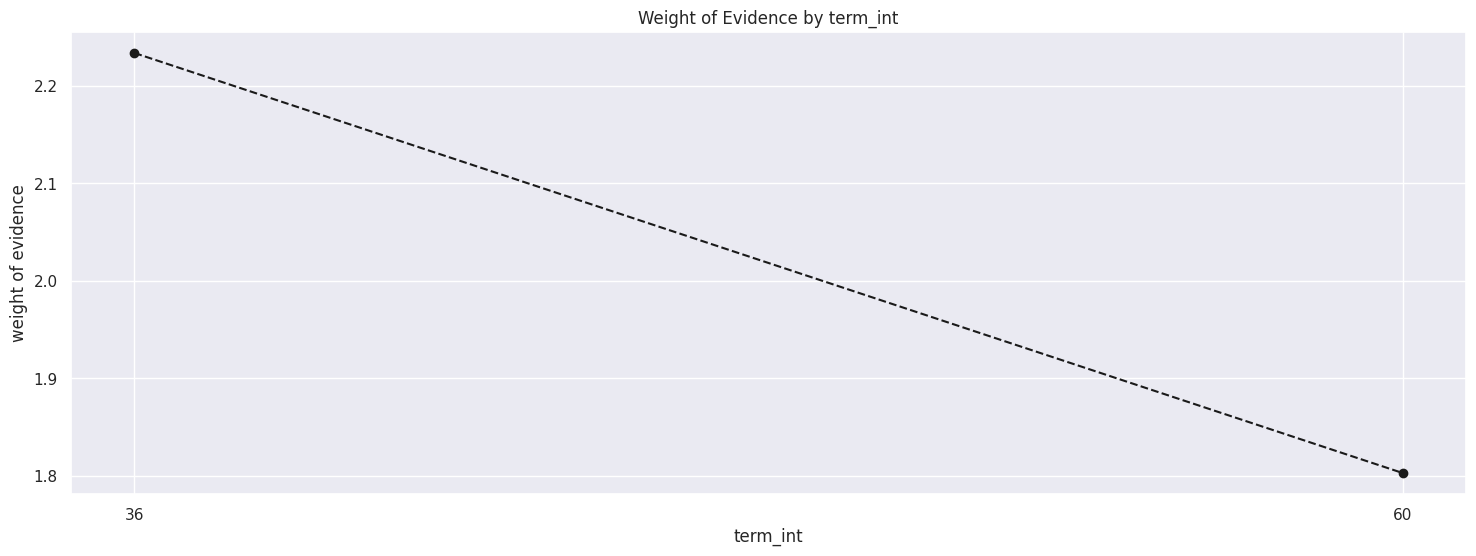

In [93]:
#plot the woe plot
plot_by_woe(df_temp_term_init)

In [94]:
#Convert it into binary encoded format by putting 1 and 0 inplace

df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [95]:
#check the unique values of 'emp_length_int' column
df_inputs_prepr['emp_length_int'].unique()

array([2.0, 3.0, 6.0, 10.0, 7.0, '0', 8.0, 1.0, 5.0, 9.0, 4.0],
      dtype=object)

In [96]:
#apply the woe_continuous function on emp_length_int
df_temp_emp_len = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp_emp_len.head(10)

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,52769,0.883625,0.141461,46628.0,6141.0,0.140303,0.018478,2.027214,NaN,NaN,1.846616
1,2.0,33032,0.889925,0.088551,29396.0,3636.0,0.088452,0.010941,2.089974,0.006300,0.062761,1.846616
2,3.0,29152,0.891500,0.078150,25989.0,3163.0,0.078201,0.009517,2.106152,0.001575,0.016178,1.846616
3,4.0,22466,0.889923,0.060226,19993.0,2473.0,0.060159,0.007441,2.089950,0.001577,0.016202,1.846616
4,5.0,24710,0.884662,0.066242,21860.0,2850.0,0.065776,0.008576,2.037339,0.005260,0.052611,1.846616
5,6.0,21000,0.882762,0.056296,18538.0,2462.0,0.055781,0.007408,2.018849,0.001900,0.018491,1.846616
6,7.0,21028,0.889956,0.056371,18714.0,2314.0,0.056310,0.006963,2.090294,0.007194,0.071446,1.846616
7,8.0,17985,0.890353,0.048214,16013.0,1972.0,0.048183,0.005934,2.094353,0.000397,0.004058,1.846616
8,9.0,14224,0.889975,0.038131,12659.0,1565.0,0.038091,0.004709,2.090483,0.000378,0.003870,1.846616
9,10.0,119840,0.900359,0.321263,107899.0,11941.0,0.324666,0.035930,2.201218,0.010384,0.110735,1.846616


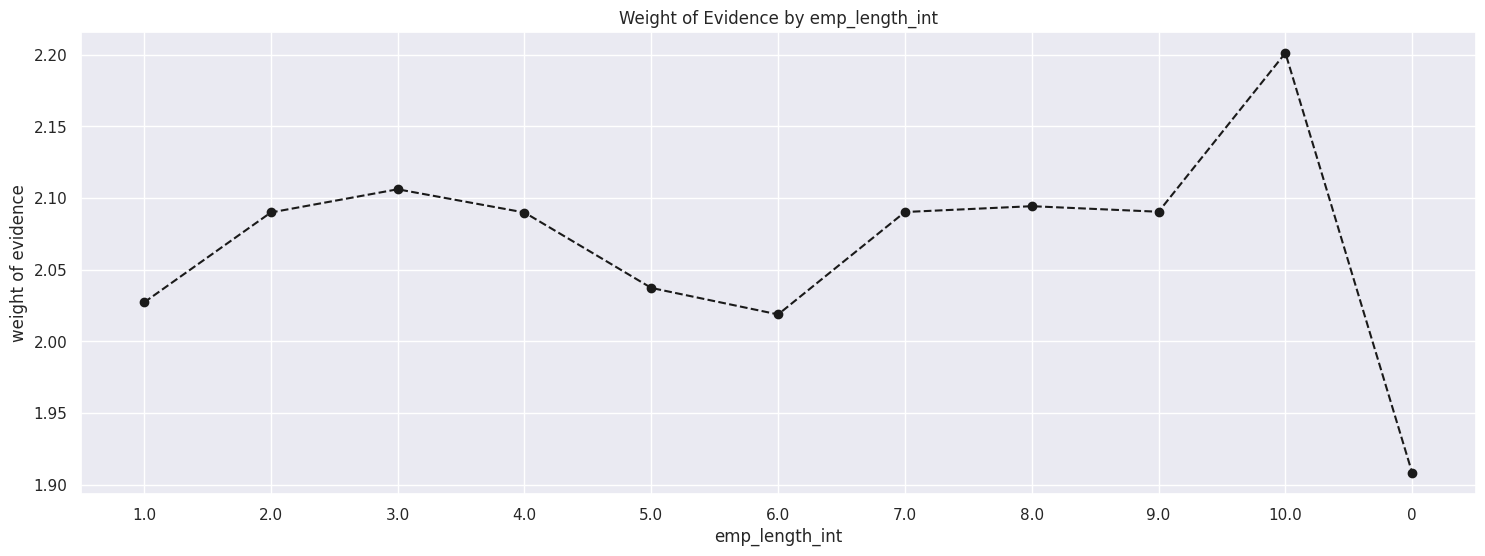

In [97]:
#plot the woe plot for emp_length_int
plot_by_woe(df_temp_emp_len)

In [98]:
##Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are
#close to each other

df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [99]:
#code to find column name based on string values
#[col for col in df_inputs_prepr.columns if 'since_issued_date' in col]
#df_inputs_prepr.filter(regex='(int_rate)')

In [100]:
#check the unique values in 'mths_since_issued_date' column
df_inputs_prepr['months_since_issue_date'].unique()

array([113., 105., 148., 109., 107., 118., 111., 128., 110., 115., 114.,
       106., 137., 159., 130., 112., 173., 108., 126., 136., 122., 119.,
       120., 134., 167., 129., 117., 116., 127., 146., 131., 135., 121.,
       187., 150., 152., 132., 145., 141., 138., 147., 123., 151., 140.,
       153., 133., 165., 124., 169., 176., 125., 149., 160., 185., 139.,
       157., 163., 155., 170., 144., 161., 143., 142., 162., 183., 156.,
       158., 168., 189., 190., 154., 174., 164., 186., 175., 171., 172.,
       182., 184., 188., 166., 180., 178., 181., 191., 179., 177., 193.,
       195., 192., 194.])

In [101]:
#get a range divided values for continous variable using the cut function defined in pandas
df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['months_since_issue_date'],8)

In [102]:
#check how the buckets are divided
(df_inputs_prepr['mths_since_issued_date_factor'].sort_values().unique()).tolist()


[Interval(104.91, 116.25, closed='right'),
 Interval(116.25, 127.5, closed='right'),
 Interval(127.5, 138.75, closed='right'),
 Interval(138.75, 150.0, closed='right'),
 Interval(150.0, 161.25, closed='right'),
 Interval(161.25, 172.5, closed='right'),
 Interval(172.5, 183.75, closed='right'),
 Interval(183.75, 195.0, closed='right')]

In [103]:

#apply the woe_continuous function
df_temp_msid = woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp_msid

,mths_since_issued_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(104.91, 116.25]",188543,0.917775,0.505439,173040.0,15503.0,0.520675,0.046648,2.412489,NaN,NaN,1.893042
1,"(116.25, 127.5]",102257,0.876224,0.274127,89600.0,12657.0,0.269605,0.038085,1.957145,0.041551,0.455344,1.893042
2,"(127.5, 138.75]",44013,0.846591,0.117988,37261.0,6752.0,0.112118,0.020317,1.708108,0.029633,0.249036,1.893042
3,"(138.75, 150.0]",19406,0.846645,0.052023,16430.0,2976.0,0.049438,0.008955,1.708529,0.000055,0.000420,1.893042
4,"(150.0, 161.25]",10451,0.858674,0.028017,8974.0,1477.0,0.027003,0.004444,1.804319,0.012028,0.095790,1.893042
5,"(161.25, 172.5]",5009,0.867239,0.013428,4344.0,665.0,0.013071,0.002001,1.876764,0.008565,0.072445,1.893042
6,"(172.5, 183.75]",1775,0.840000,0.004758,1491.0,284.0,0.004486,0.000855,1.658228,0.027239,0.218536,1.893042
7,"(183.75, 195.0]",1574,0.761118,0.004220,1198.0,376.0,0.003605,0.001131,1.158820,0.078882,0.499408,1.893042


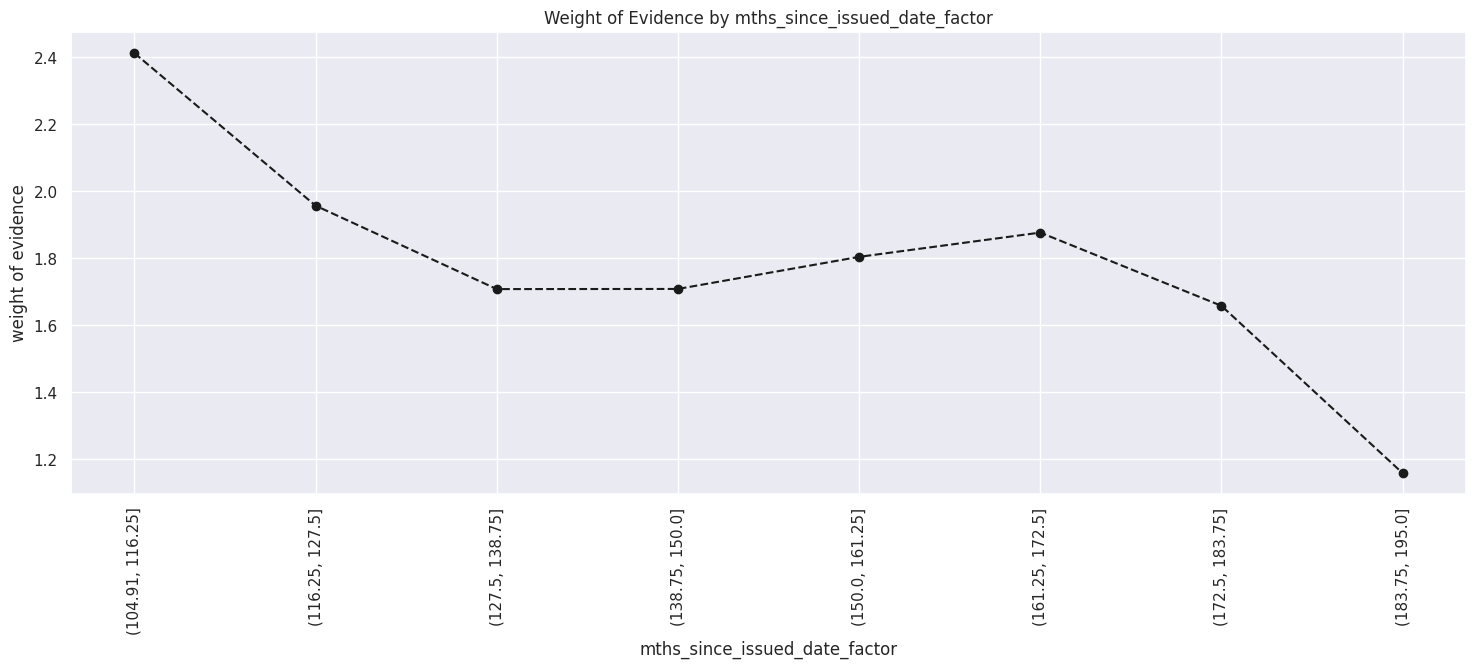

In [104]:
#plot the woe plot
plot_by_woe(df_temp_msid,90)

Initially we created 50 buckets and analyzed the data where for less no. of months(say 104 to 112) we have high WoE values but then WoE(though fluctuating) is not varying so much in values so we divided our data into 8 buckets instead based on 88 unique values for 'months_since_issue_date' column.

In [105]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_issued_date:<116']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(116)),1,0)
df_inputs_prepr['mths_since_issued_date:116-127']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(116,127)),1,0)
df_inputs_prepr['mths_since_issued_date:127-138']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(127,138)),1,0)
df_inputs_prepr['mths_since_issued_date:138-150']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(138,150)),1,0)
df_inputs_prepr['mths_since_issued_date:150-161']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(150,161)),1,0)
df_inputs_prepr['mths_since_issued_date:161-172']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(161,172)),1,0)
df_inputs_prepr['mths_since_issued_date:172-183']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(172,183)),1,0)
df_inputs_prepr['mths_since_issued_date:>183']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(183,int(df_inputs_prepr['months_since_issue_date'].max()))),1,0)

In [106]:
#check the values for 'int_rate'
df_inputs_prepr['int_rate'].nunique()


504

In [107]:
#apply the cut function on 'int_rate_factor'
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)

In [108]:
#apply the woe_continuos function
df_temp_int_rt = woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp_int_rt.head(10)

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",795,0.961006,0.002131,764.0,31.0,0.002299,0.000093,3.204581,NaN,NaN,2.047293
1,"(5.833, 6.246]",8518,0.980629,0.022835,8353.0,165.0,0.025134,0.000496,3.924431,0.019623,0.719850,2.047293
2,"(6.246, 6.658]",7876,0.971178,0.021114,7649.0,227.0,0.023016,0.000683,3.517380,0.009451,0.407050,2.047293
3,"(6.658, 7.071]",1841,0.966323,0.004935,1779.0,62.0,0.005353,0.000187,3.356672,0.004856,0.160708,2.047293
4,"(7.071, 7.484]",3161,0.977222,0.008474,3089.0,72.0,0.009295,0.000217,3.758937,0.010900,0.402264,2.047293
5,"(7.484, 7.897]",12640,0.963212,0.033885,12175.0,465.0,0.036634,0.001399,3.265103,0.014010,0.493834,2.047293
6,"(7.897, 8.31]",9640,0.951971,0.025843,9177.0,463.0,0.027613,0.001393,2.986729,0.011241,0.278374,2.047293
7,"(8.31, 8.722]",6641,0.965216,0.017803,6410.0,231.0,0.019288,0.000695,3.323197,0.013245,0.336468,2.047293
8,"(8.722, 9.135]",9531,0.938726,0.025550,8947.0,584.0,0.026921,0.001757,2.729173,0.026490,0.594024,2.047293
9,"(9.135, 9.548]",6545,0.966081,0.017546,6323.0,222.0,0.019026,0.000668,3.349272,0.027355,0.620099,2.047293


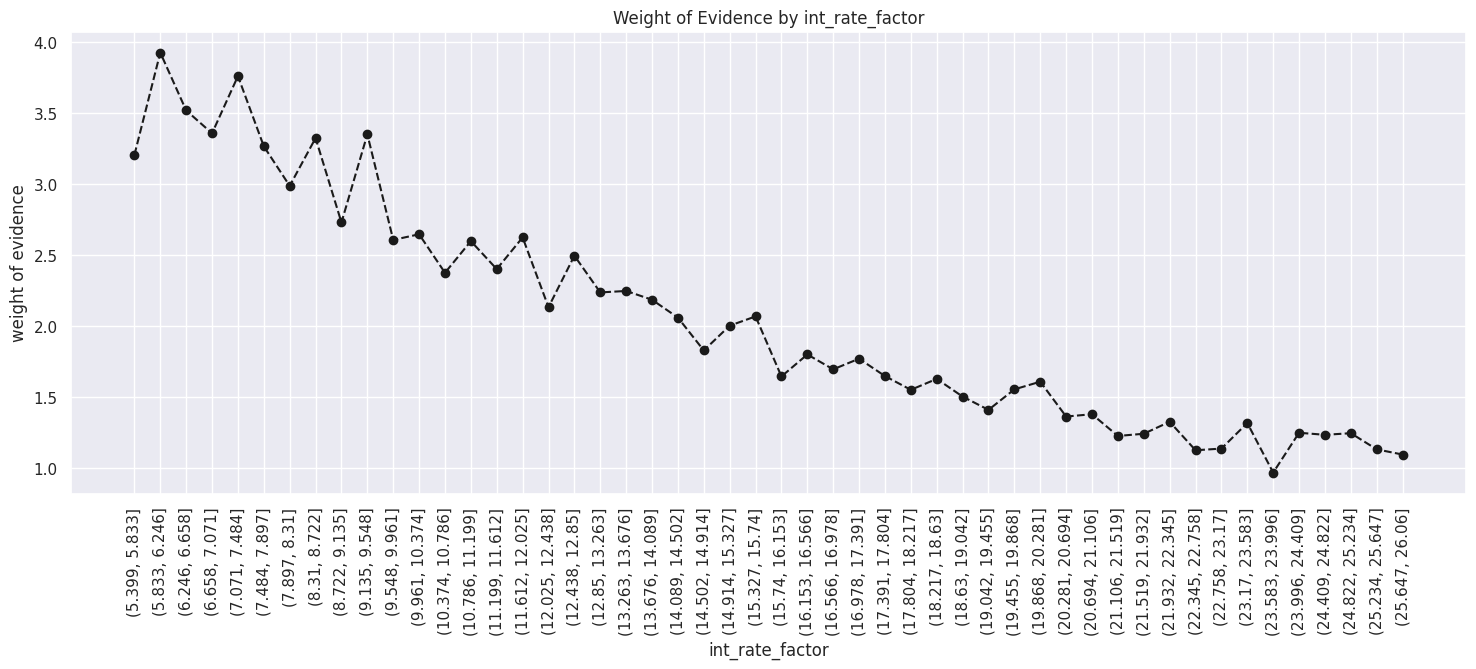

In [109]:
#plot the woe plot
plot_by_woe(df_temp_int_rt,90)

As we can observe that WoE values drop rate increases as interest rate crosses 9.548. Let's bucket create a binary column for consolidated int_rate with WoE values close to each other

In [110]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.85']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.85-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



In [111]:
#prepossing of 'funded_amt_factor'
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp_int_faf = woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp_int_faf.head(10)

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1206,0.900498,0.003233,1086.0,120.0,0.003268,0.000361,2.202765,NaN,NaN,1.851361
1,"(1190.0, 1880.0]",3048,0.904856,0.008171,2758.0,290.0,0.008299,0.000873,2.252380,0.004358,0.049615,1.851361
2,"(1880.0, 2570.0]",6010,0.894343,0.016111,5375.0,635.0,0.016173,0.001911,2.135889,0.010513,0.116491,1.851361
3,"(2570.0, 3260.0]",7183,0.888765,0.019256,6384.0,799.0,0.019209,0.002404,2.078189,0.005578,0.057700,1.851361
4,"(3260.0, 3950.0]",4724,0.893522,0.012664,4221.0,503.0,0.012701,0.001514,2.127237,0.004757,0.049048,1.851361
5,"(3950.0, 4640.0]",9073,0.891326,0.024323,8087.0,986.0,0.024334,0.002967,2.104357,0.002197,0.022880,1.851361
6,"(4640.0, 5330.0]",15886,0.894687,0.042587,14213.0,1673.0,0.042767,0.005034,2.139539,0.003361,0.035182,1.851361
7,"(5330.0, 6020.0]",17171,0.907169,0.046031,15577.0,1594.0,0.046871,0.004796,2.279549,0.012482,0.140010,1.851361
8,"(6020.0, 6710.0]",6886,0.885710,0.018460,6099.0,787.0,0.018352,0.002368,2.047652,0.021459,0.231897,1.851361
9,"(6710.0, 7400.0]",11717,0.897414,0.031411,10515.0,1202.0,0.031639,0.003617,2.168816,0.011704,0.121164,1.851361


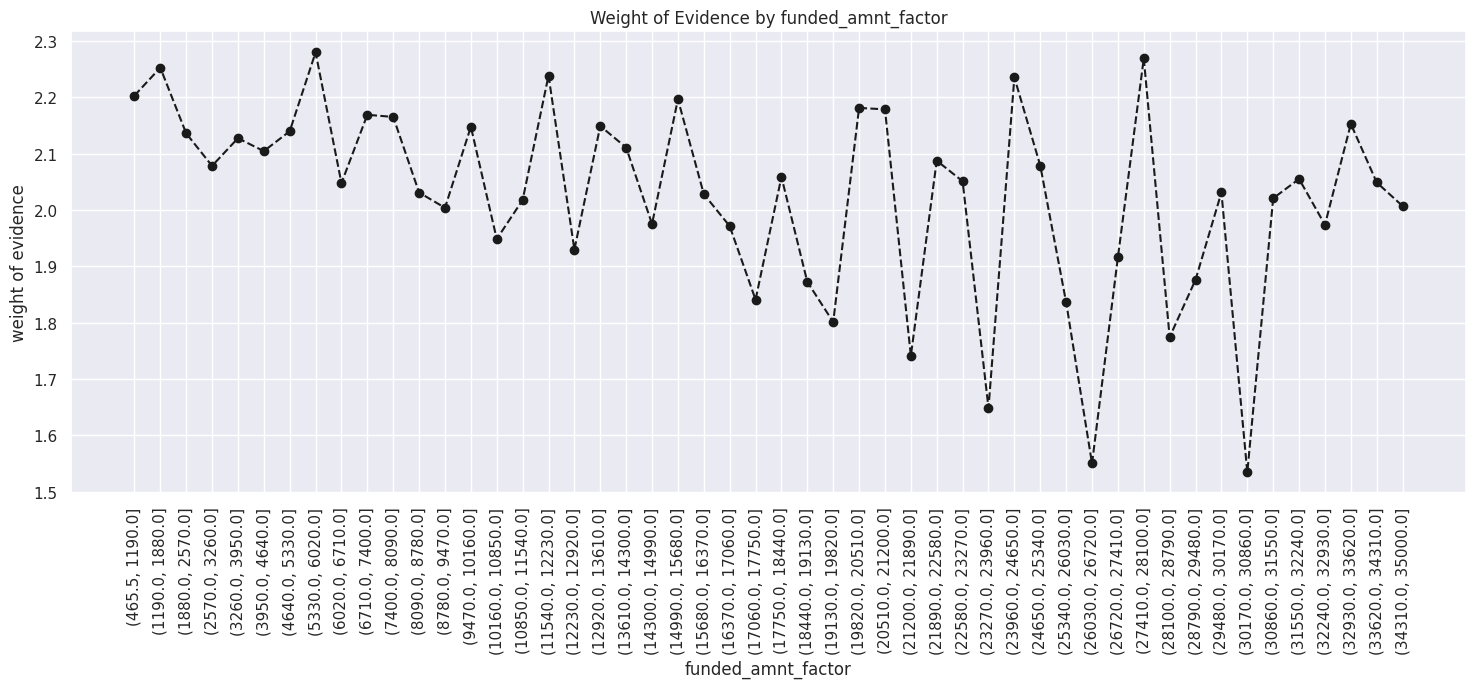

In [112]:
#plot the woe_plot
plot_by_woe(df_temp_int_faf,90)

In [113]:
#check the no. of unique values for 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line'].nunique()

516

In [114]:
#apply the cut function on 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line'] = df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)


In [115]:
#check the 'mths_since_earliest_cr_line_factor'
df_inputs_prepr['mths_since_earliest_cr_line_factor'].sort_values().unique()

[(-0.656, 13.12], (131.2, 144.32], (144.32, 157.44], (157.44, 170.56], (170.56, 183.68], ..., (590.4, 603.52], (603.52, 616.64], (616.64, 629.76], (629.76, 642.88], (642.88, 656.0]]
Length: 41
Categories (50, interval[float64, right]): [(-0.656, 13.12] < (13.12, 26.24] < (26.24, 39.36] <
                                            (39.36, 52.48] ... (603.52, 616.64] <
                                            (616.64, 629.76] < (629.76, 642.88] < (642.88, 656.0]]

In [116]:
#apply the woe_continuos function
df_temp_int_mse_cr_line = woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp_int_mse_cr_line.head(12)

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.656, 13.12]",25,0.880000,0.000067,22.0,3.0,0.000066,0.000009,1.992430,NaN,NaN,1.852287
1,"(13.12, 26.24]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
2,"(26.24, 39.36]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
3,"(39.36, 52.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
4,"(52.48, 65.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
5,"(65.6, 78.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
6,"(78.72, 91.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
7,"(91.84, 104.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
8,"(104.96, 118.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
9,"(118.08, 131.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287


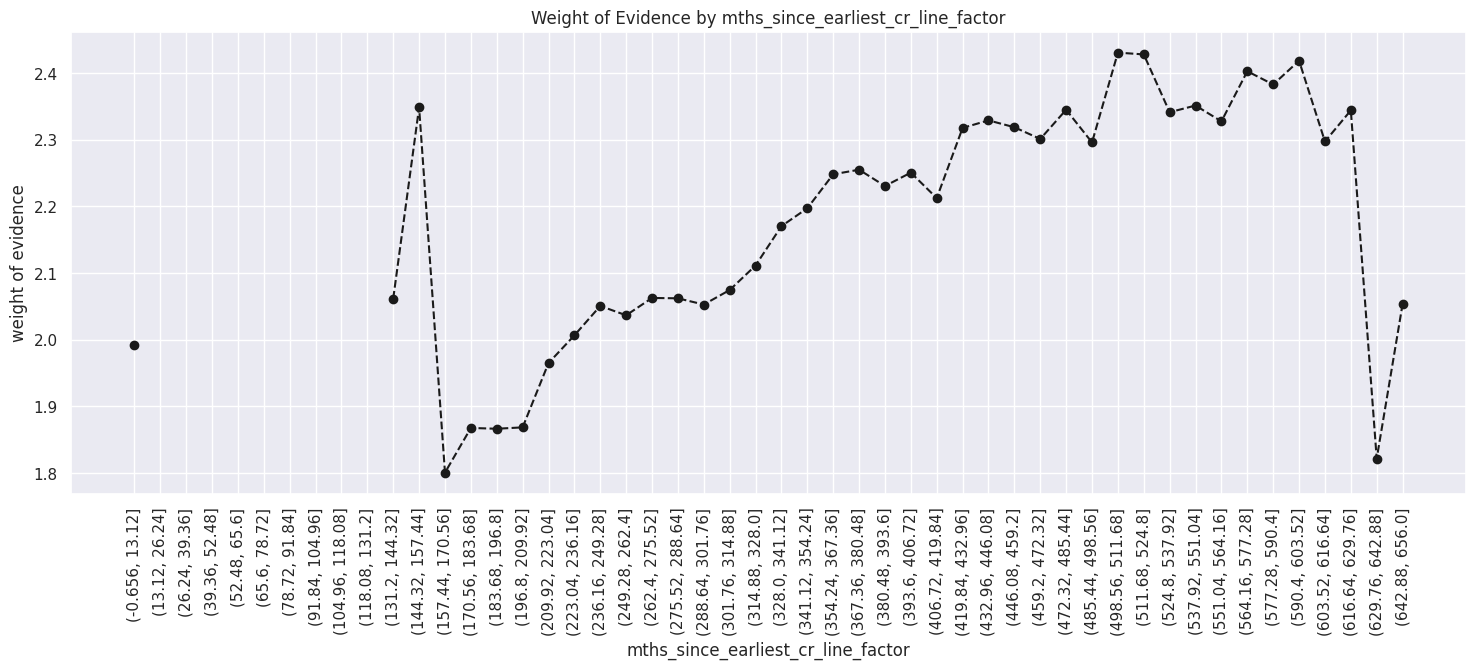

In [117]:
#plot the woe_plot
plot_by_woe(df_temp_int_mse_cr_line,90)

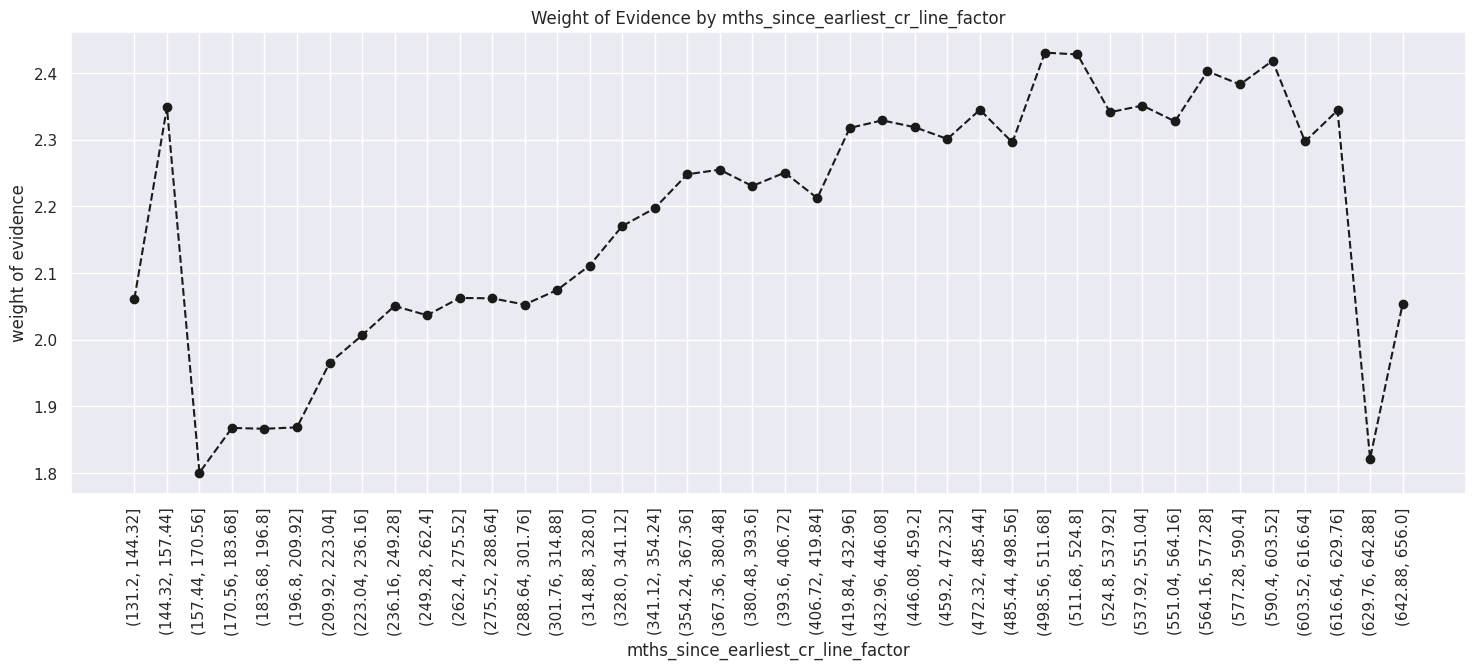

In [118]:
#plot for df_temp.iloc[10:,:],90
plot_by_woe(df_temp_int_mse_cr_line.iloc[10:,:],90)

In [119]:
#Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_earliest_cr_line:<140']   = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,239)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,339)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,439)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,539)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,639)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']   = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(640,int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))),1,0)

#df_inputs_prepr.head(5)

In [120]:
#check the 'installment' unique values
df_inputs_prepr['installment'].unique()

array([533.75, 673.27,  81.44, ..., 415.  , 124.32, 830.15])

In [121]:
#apply the cut function and woe_continuos function on 'installment'
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)
df_temp_if = woe_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_temp_if.head(5)

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1800,0.899444,0.004825,1619.0,181.0,0.004872,0.000545,2.191067,NaN,NaN,1.850883
1,"(43.556, 71.443]",4846,0.902187,0.012991,4372.0,474.0,0.013155,0.001426,2.221769,0.002743,0.030702,1.850883
2,"(71.443, 99.329]",6846,0.891908,0.018353,6106.0,740.0,0.018373,0.002227,2.110377,0.010280,0.111392,1.850883
3,"(99.329, 127.216]",9059,0.890496,0.024285,8067.0,992.0,0.024273,0.002985,2.095814,0.001412,0.014563,1.850883
4,"(127.216, 155.102]",10110,0.897230,0.027103,9071.0,1039.0,0.027295,0.003126,2.166824,0.006735,0.071010,1.850883


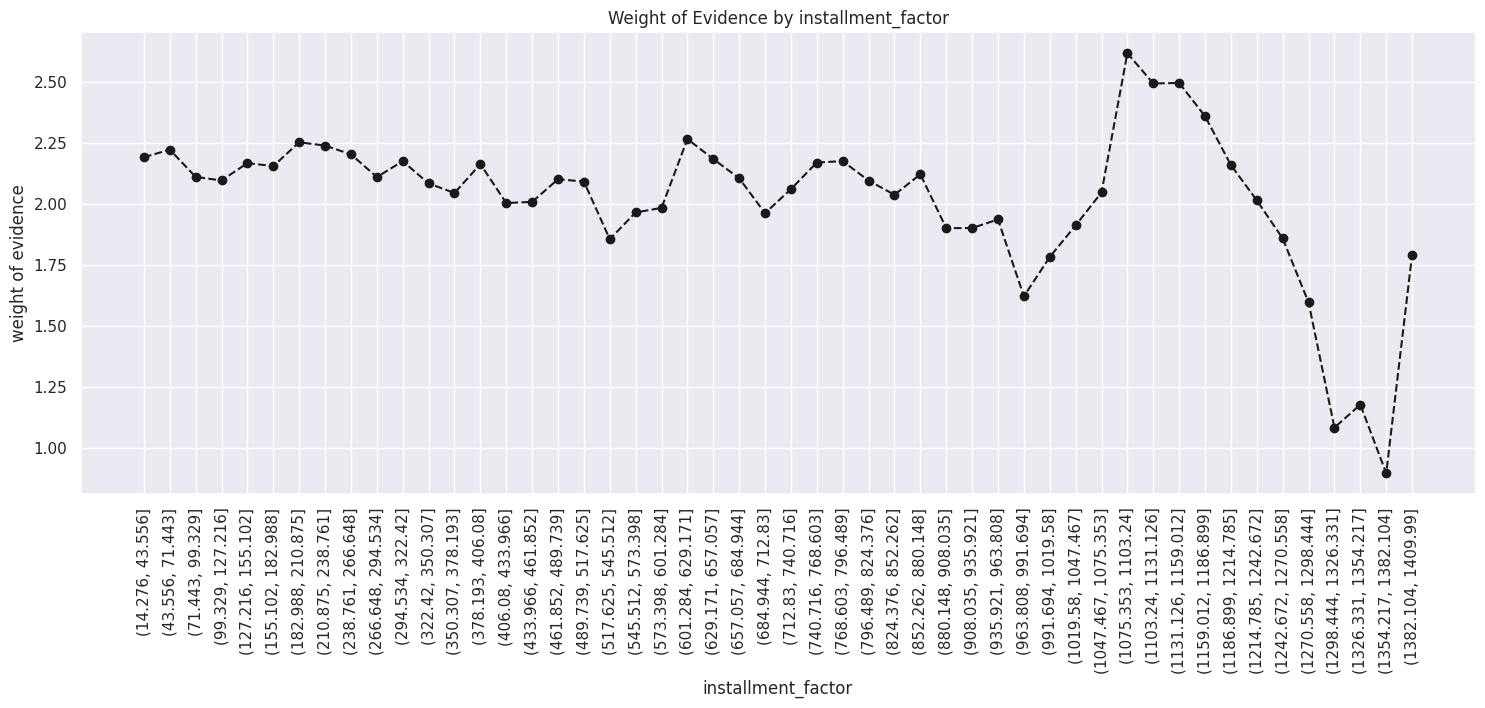

In [122]:
#plot the woe_plot
plot_by_woe(df_temp_if,90)

In [123]:
df_inputs_prepr['installment<963.808']= np.where(df_inputs_prepr['installment'] <= 963.808,1,0)
df_inputs_prepr['installment>=963.808']= np.where(((df_inputs_prepr['installment'] > 963.808) & (df_inputs_prepr['installment']<= df_inputs_prepr['installment'].max())),1,0)


In [124]:
#check the 'deling_2yrs' column
df_inputs_prepr['delinq_2yrs'] = df_inputs_prepr['delinq_2yrs'].astype(float)
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  2.,  1.,  3., 15.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       13., 18., 12., 14., 17., 16., 19., 29., 22., 24., 21.])

In [125]:
#df_inputs_prepr.drop('delinq_2yrs_factors', axis = 1, inplace = True)

In [126]:
#apply the cut function
# df_inputs_prepr['delinq_2yrs_factors'] = pd.cut(df_inputs_prepr['delinq_2yrs'],25)
# df_inputs_prepr['delinq_2yrs_factors'].unique()

#not using cut as we have small no. of unique values for delinq_2yrs which we can combine based on closer WoE values

In [127]:
#apply the woe_continuos function
df_temp_d2yr = woe_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_temp_d2yr.head(20)

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306370,0.890743,0.821306,272897.0,33473.0,0.821143,0.100720,2.098355,NaN,NaN,1.843195
1,1.0,45002,0.892849,0.120640,40180.0,4822.0,0.120901,0.014509,2.120181,0.002106,0.021825,1.843195
2,2.0,13080,0.890214,0.035064,11644.0,1436.0,0.035037,0.004321,2.092930,0.002635,0.027251,1.843195
3,3.0,4537,0.886930,0.012163,4024.0,513.0,0.012108,0.001544,2.059756,0.003284,0.033174,1.843195
4,4.0,1891,0.893178,0.005069,1689.0,202.0,0.005082,0.000608,2.123624,0.006249,0.063868,1.843195
5,5.0,980,0.884694,0.002627,867.0,113.0,0.002609,0.000340,2.037651,0.008484,0.085973,1.843195
6,6.0,509,0.899804,0.001365,458.0,51.0,0.001378,0.000153,2.195044,0.015110,0.157392,1.843195
7,7.0,264,0.878788,0.000708,232.0,32.0,0.000698,0.000096,1.981001,0.021016,0.214042,1.843195
8,8.0,136,0.926471,0.000365,126.0,10.0,0.000379,0.000030,2.533697,0.047683,0.552695,1.843195
9,9.0,98,0.887755,0.000263,87.0,11.0,0.000262,0.000033,2.068013,0.038715,0.465684,1.843195


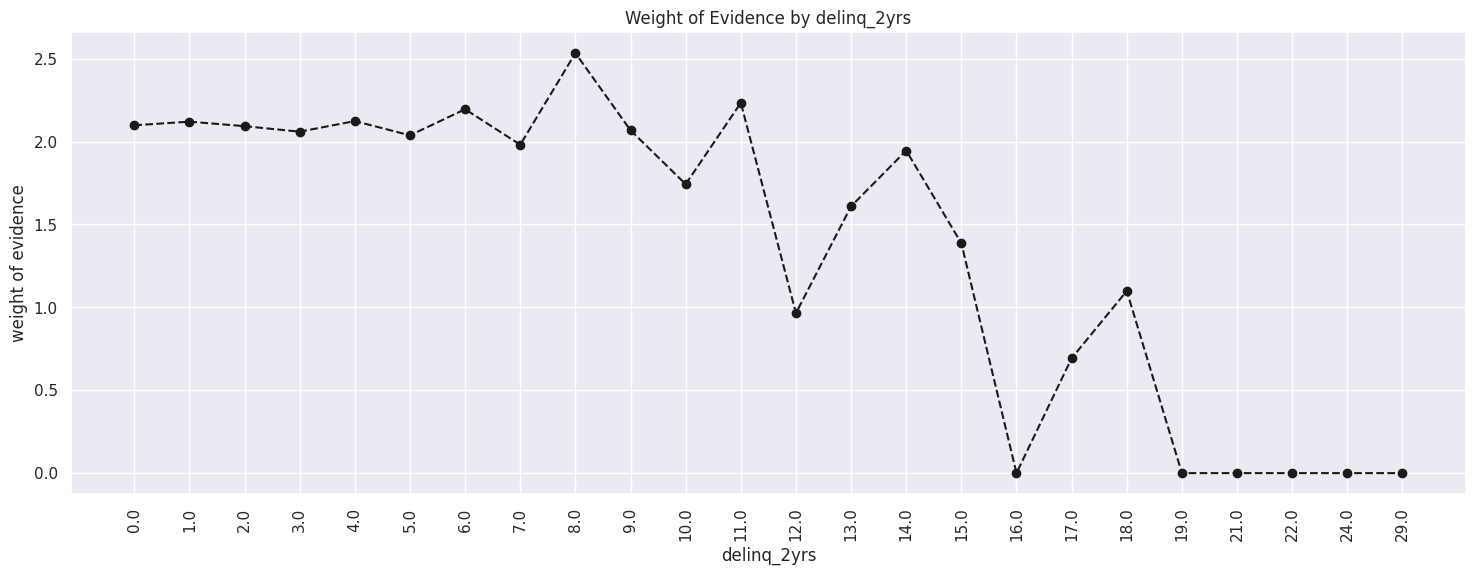

In [128]:
#plot the woe_plot
plot_by_woe(df_temp_d2yr,90)

In [129]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['delinq_2yrs:0']= np.where((df_inputs_prepr['delinq_2yrs'] == 0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-5']= np.where(((df_inputs_prepr['delinq_2yrs'] > 0) & (df_inputs_prepr['delinq_2yrs']<= 5)),1,0)
df_inputs_prepr['delinq_2yrs:5-7']= np.where(((df_inputs_prepr['delinq_2yrs'] > 5) & (df_inputs_prepr['delinq_2yrs']<= 7)),1,0)
df_inputs_prepr['delinq_2yrs:7-9']= np.where(((df_inputs_prepr['delinq_2yrs'] > 7) & (df_inputs_prepr['delinq_2yrs']<= 9)),1,0)
df_inputs_prepr['delinq_2yrs:9-11']= np.where(((df_inputs_prepr['delinq_2yrs'] > 9) & (df_inputs_prepr['delinq_2yrs']<= 11)),1,0)
df_inputs_prepr['delinq_2yrs:11-12']= np.where(((df_inputs_prepr['delinq_2yrs'] > 11) & (df_inputs_prepr['delinq_2yrs']<= 12)),1,0)
df_inputs_prepr['delinq_2yrs:12-18']= np.where(((df_inputs_prepr['delinq_2yrs'] > 12) & (df_inputs_prepr['delinq_2yrs']<= 18)),1,0)
df_inputs_prepr['delinq_2yrs:>18']= np.where(((df_inputs_prepr['delinq_2yrs'] > 18) ),1,0)

In [130]:
#conver the 'inq_last_6mths' column as float type
df_inputs_prepr['inq_last_6mths']= df_inputs_prepr['inq_last_6mths'].astype(float)
df_inputs_prepr['inq_last_6mths'].unique()

array([ 3.,  0.,  1.,  2.,  4.,  5., 18., 10.,  6.,  7.,  8.,  9., 12.,
       13., 14., 32., 11., 16., 20., 15., 24., 28., 31., 17., 33., 27.,
       19.])

In [131]:
#apply the woe_continuos function
df_temp_inq_6m = woe_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_temp_inq_6m.head(20)

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193056,0.909011,0.517538,175490.0,17566.0,0.528047,0.052856,2.301617,NaN,NaN,1.871038
1,1.0,104173,0.884337,0.279263,92124.0,12049.0,0.277200,0.036255,2.034154,0.024674,0.267463,1.871038
2,2.0,46295,0.864348,0.124106,40015.0,6280.0,0.120405,0.018896,1.851884,0.019988,0.182269,1.871038
3,3.0,20142,0.842121,0.053996,16962.0,3180.0,0.051038,0.009569,1.674094,0.022227,0.177790,1.871038
4,4.0,5861,0.846101,0.015712,4959.0,902.0,0.014922,0.002714,1.704345,0.003980,0.030251,1.871038
5,5.0,2216,0.824007,0.005941,1826.0,390.0,0.005494,0.001174,1.543736,0.022094,0.160609,1.871038
6,6.0,928,0.786638,0.002488,730.0,198.0,0.002197,0.000596,1.304778,0.037369,0.238959,1.871038
7,7.0,149,0.630872,0.000399,94.0,55.0,0.000283,0.000165,0.535962,0.155765,0.768816,1.871038
8,8.0,95,0.663158,0.000255,63.0,32.0,0.000190,0.000096,0.677399,0.032285,0.141437,1.871038
9,9.0,42,0.642857,0.000113,27.0,15.0,0.000081,0.000045,0.587787,0.020301,0.089612,1.871038


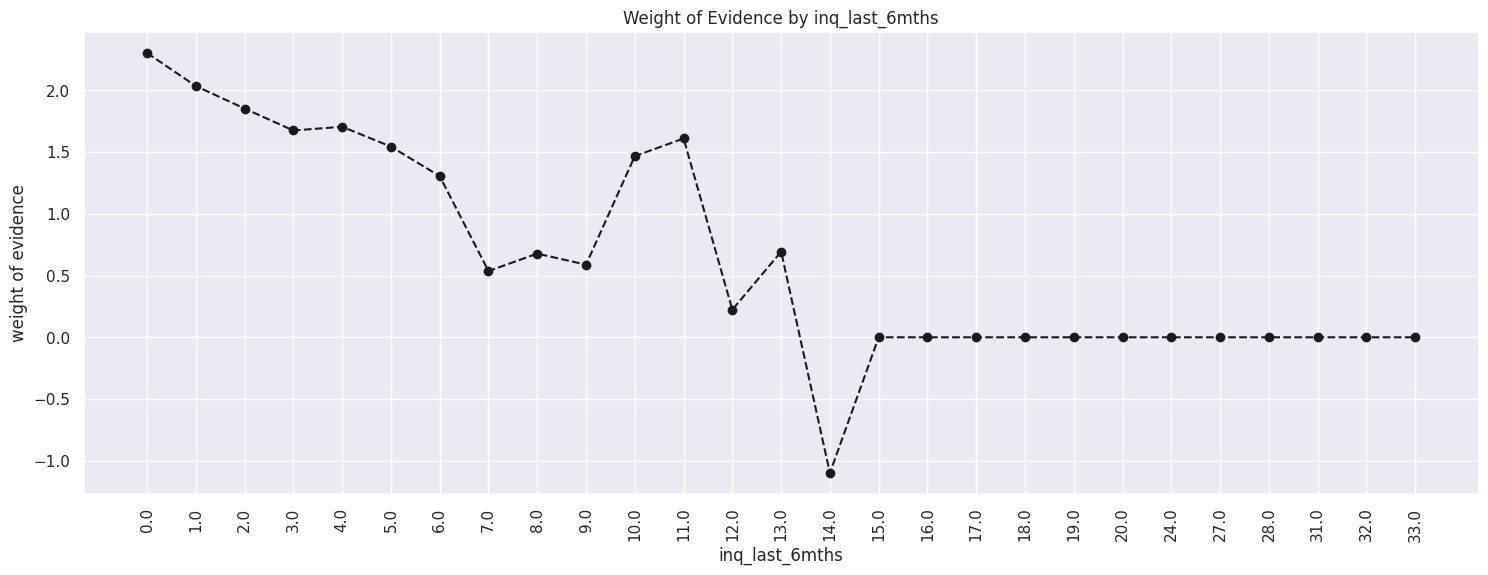

In [132]:
#plot the woe_plot
plot_by_woe(df_temp_inq_6m,90)

In [133]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['inq_last_6mths:0']= np.where((df_inputs_prepr['inq_last_6mths'] == 0.0),1,0)
df_inputs_prepr['inq_last_6mths:0-4']= np.where(((df_inputs_prepr['inq_last_6mths'] > 0) & (df_inputs_prepr['inq_last_6mths']<= 4)),1,0)
df_inputs_prepr['inq_last_6mths:4-6']= np.where(((df_inputs_prepr['inq_last_6mths'] > 4) & (df_inputs_prepr['inq_last_6mths']<= 6)),1,0)
df_inputs_prepr['inq_last_6mths:6-9']= np.where(((df_inputs_prepr['inq_last_6mths'] > 6) & (df_inputs_prepr['inq_last_6mths']<= 9)),1,0)
df_inputs_prepr['inq_last_6mths:9-11']= np.where(((df_inputs_prepr['inq_last_6mths'] > 9) & (df_inputs_prepr['inq_last_6mths']<= 11)),1,0)
df_inputs_prepr['inq_last_6mths:11-13']= np.where(((df_inputs_prepr['inq_last_6mths'] > 11) & (df_inputs_prepr['inq_last_6mths']<= 13)),1,0)
df_inputs_prepr['inq_last_6mths:>13']= np.where((df_inputs_prepr['inq_last_6mths'] > 13),1,0)


In [134]:
#check the no. of unique values for 'open_acc' column
df_inputs_prepr['open_acc'].nunique()

63

In [135]:
#convert the 'open_acc' into float and then apply the woe_continuos function
df_inputs_prepr['open_acc']= df_inputs_prepr['open_acc'].astype(float)
df_temp_open_acc=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp_open_acc.head(10)

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.827586,0.000078,24.0,5.0,0.000072,0.000015,1.568616,NaN,NaN,1.843632
1,1.0,116,0.870690,0.000311,101.0,15.0,0.000304,0.000045,1.907070,0.043103,0.338454,1.843632
2,2.0,1431,0.849755,0.003836,1216.0,215.0,0.003659,0.000647,1.732684,0.020934,0.174386,1.843632
3,3.0,4467,0.869487,0.011975,3884.0,583.0,0.011687,0.001754,1.896434,0.019732,0.163750,1.843632
4,4.0,10026,0.893477,0.026877,8958.0,1068.0,0.026954,0.003214,2.126759,0.023990,0.230326,1.843632
5,5.0,17256,0.891748,0.046259,15388.0,1868.0,0.046302,0.005621,2.108720,0.001729,0.018040,1.843632
6,6.0,24615,0.893764,0.065987,22000.0,2615.0,0.066198,0.007868,2.129778,0.002016,0.021059,1.843632
7,7.0,30110,0.891099,0.080718,26831.0,3279.0,0.080734,0.009866,2.102019,0.002665,0.027759,1.843632
8,8.0,33419,0.891499,0.089588,29793.0,3626.0,0.089647,0.010911,2.106143,0.000400,0.004124,1.843632
9,9.0,35097,0.890076,0.094087,31239.0,3858.0,0.093998,0.011609,2.091518,0.001423,0.014625,1.843632


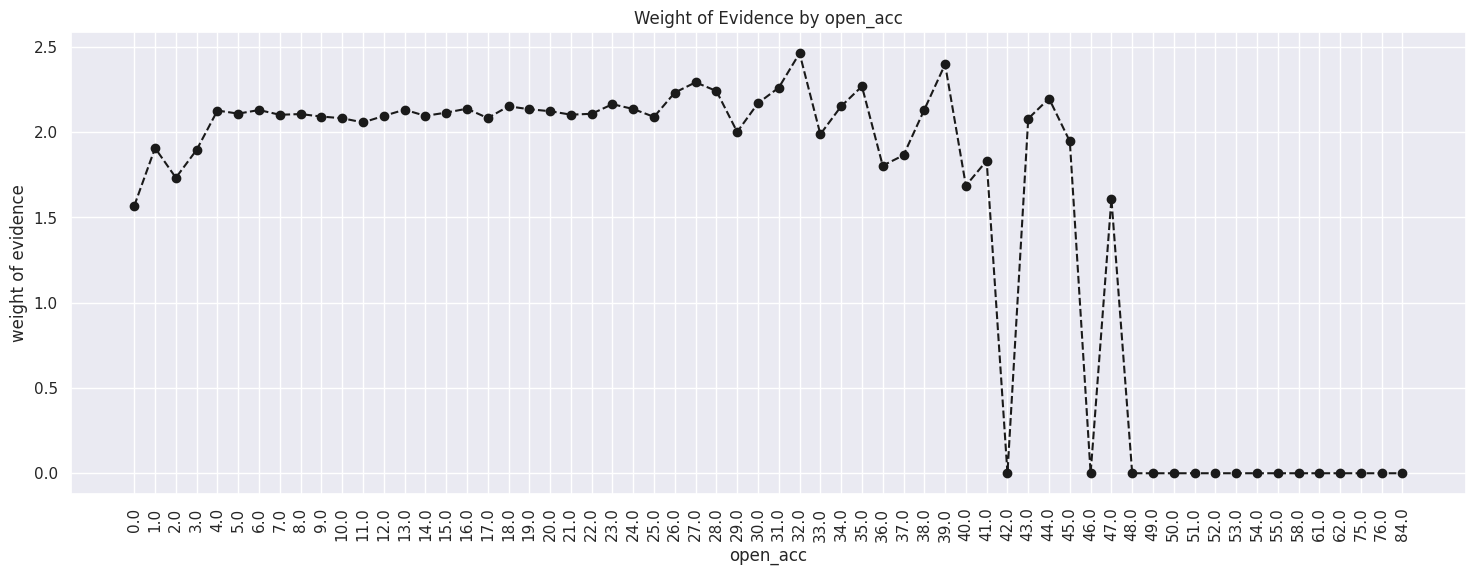

In [136]:
#plot the woe_plot
plot_by_woe(df_temp_open_acc,90)

In [137]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['open_acc:=0']= np.where((df_inputs_prepr['open_acc'] == 0.0),1,0)
df_inputs_prepr['open_acc:0-4']= np.where(((df_inputs_prepr['open_acc'] > 0) & (df_inputs_prepr['open_acc']<= 4)),1,0)
df_inputs_prepr['open_acc:4-26']= np.where(((df_inputs_prepr['open_acc'] > 4) & (df_inputs_prepr['open_acc']<= 26)),1,0)
df_inputs_prepr['open_acc:26-28']= np.where(((df_inputs_prepr['open_acc'] > 26) & (df_inputs_prepr['open_acc']<= 28)),1,0)
df_inputs_prepr['open_acc:28-33']= np.where(((df_inputs_prepr['open_acc'] > 28) & (df_inputs_prepr['open_acc']<= 33)),1,0)
df_inputs_prepr['open_acc:33-39']= np.where(((df_inputs_prepr['open_acc'] > 33) & (df_inputs_prepr['open_acc']<= 39)),1,0)
df_inputs_prepr['open_acc:>39']= np.where((df_inputs_prepr['open_acc'] > 39),1,0)

In [138]:
#convert the 'pub_rec' into float and check the unique values
df_inputs_prepr['pub_rec']= df_inputs_prepr['pub_rec'].astype(float)
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  2.,  5.,  3.,  4.,  7.,  6.,  9.,  8., 54., 10., 21.,
       19., 11., 16., 40., 17., 13., 18., 15., 34., 63., 14., 12.])

In [139]:
#apply the woe_continuos function
df_temp_pub_rec=woe_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_temp_pub_rec.head(10)

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,324048,0.889921,0.868696,288377.0,35671.0,0.867722,0.107333,2.089931,NaN,NaN,1.843436
1,1.0,42367,0.895744,0.113576,37950.0,4417.0,0.114191,0.013291,2.150809,0.005824,0.060878,1.843436
2,2.0,4488,0.905080,0.012031,4062.0,426.0,0.012222,0.001282,2.254991,0.009336,0.104183,1.843436
3,3.0,1285,0.919066,0.003445,1181.0,104.0,0.003554,0.000313,2.429726,0.013986,0.174735,1.843436
4,4.0,408,0.911765,0.001094,372.0,36.0,0.001119,0.000108,2.335375,0.007301,0.094351,1.843436
5,5.0,218,0.894495,0.000584,195.0,23.0,0.000587,0.000069,2.137505,0.017269,0.197870,1.843436
6,6.0,109,0.935780,0.000292,102.0,7.0,0.000307,0.000021,2.679063,0.041284,0.541557,1.843436
7,7.0,42,0.928571,0.000113,39.0,3.0,0.000117,0.000009,2.564949,0.007208,0.114113,1.843436
8,8.0,21,0.952381,0.000056,20.0,1.0,0.000060,0.000003,2.995732,0.023810,0.430783,1.843436
9,9.0,11,0.818182,0.000029,9.0,2.0,0.000027,0.000006,1.504077,0.134199,1.491655,1.843436


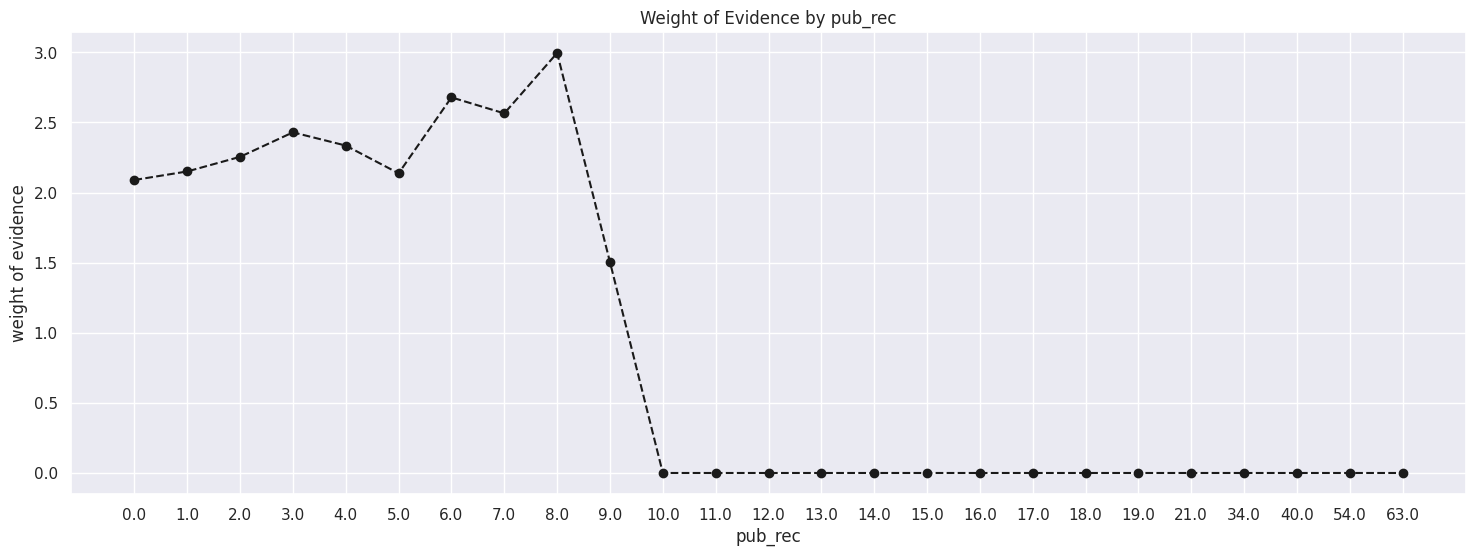

In [140]:
#plot the woe_plot
plot_by_woe(df_temp_pub_rec)

In [141]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['pub_rec:0-6']= np.where(((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec']< 6)),1,0)
df_inputs_prepr['pub_rec:6-9']= np.where(((df_inputs_prepr['pub_rec'] >= 6) & (df_inputs_prepr['pub_rec']< 9)),1,0)
df_inputs_prepr['pub_rec:9-10']= np.where(((df_inputs_prepr['pub_rec'] >= 9) & (df_inputs_prepr['pub_rec']< 10)),1,0)
df_inputs_prepr['pub_rec>10']= np.where((df_inputs_prepr['pub_rec'] >= 10) ,1,0)

In [142]:
#convert the 'total_acc' into float and check the unique values for this column
df_inputs_prepr['total_acc'] = df_inputs_prepr['total_acc'].astype(float)
df_inputs_prepr['total_acc'].unique()

array([ 18.,  15.,  12.,  28.,  22.,  21.,  20.,  24.,  25.,  23.,  52.,
        26.,  16.,  13.,   9.,  43.,  42.,  14.,  19.,  29.,  11.,  33.,
        37.,  17.,  38.,  32.,  30.,  34.,  39.,   6.,   5.,   7.,  35.,
        10.,   8.,  31.,  47.,  27.,  41.,  49.,  36.,  44.,  53.,  46.,
        40.,  45.,  55.,   3.,   4.,  51.,  54.,  50.,  66.,  58.,  63.,
        56.,  48.,  75.,  59.,  64.,  81.,  71.,  62.,  57.,  60.,  61.,
        73.,  68.,  69.,   2.,  84.,  67.,  65.,   0.,  78.,  98.,  70.,
        86.,  80.,  77.,  74.,  76.,  82.,  91.,  83.,  92.,  72.,   1.,
        87.,  94.,  93.,  79.,  89., 156., 105., 121.,  97.,  95.,  85.,
       102.,  88., 101., 100., 124.,  90.,  96.,  99., 118., 150., 116.,
       119., 117.])

In [143]:
#apply the cut function to create buckets of continuos variables
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [144]:
#apply the woe_continuos function
df_temp_pub_tot_acc=woe_continuous(df_inputs_prepr,'total_acc_fac',df_targets_prepr)
df_temp_pub_tot_acc.head(10)

,total_acc_fac,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",472,0.802966,0.001265,379.0,93.0,0.001140,0.000280,1.404937,NaN,NaN,1.84685
1,"(3.12, 6.24]",5981,0.864906,0.016034,5173.0,808.0,0.015565,0.002431,1.856646,0.061939,0.451709,1.84685
2,"(6.24, 9.36]",15031,0.874659,0.040295,13147.0,1884.0,0.039559,0.005669,1.942796,0.009754,0.086150,1.84685
3,"(9.36, 12.48]",25162,0.880335,0.067453,22151.0,3011.0,0.066652,0.009060,1.995610,0.005676,0.052814,1.84685
4,"(12.48, 15.6]",33528,0.883739,0.089881,29630.0,3898.0,0.089156,0.011729,2.028324,0.003404,0.032713,1.84685
5,"(15.6, 18.72]",38724,0.888648,0.103810,34412.0,4312.0,0.103545,0.012975,2.077004,0.004909,0.048680,1.84685
6,"(18.72, 21.84]",40682,0.887297,0.109059,36097.0,4585.0,0.108615,0.013796,2.063420,0.001351,0.013584,1.84685
7,"(21.84, 24.96]",40191,0.891667,0.107743,35837.0,4354.0,0.107833,0.013101,2.107886,0.004371,0.044466,1.84685
8,"(24.96, 28.08]",47300,0.895328,0.126800,42349.0,4951.0,0.127427,0.014897,2.146355,0.003660,0.038469,1.84685
9,"(28.08, 31.2]",29711,0.897445,0.079648,26664.0,3047.0,0.080232,0.009168,2.169157,0.002118,0.022802,1.84685


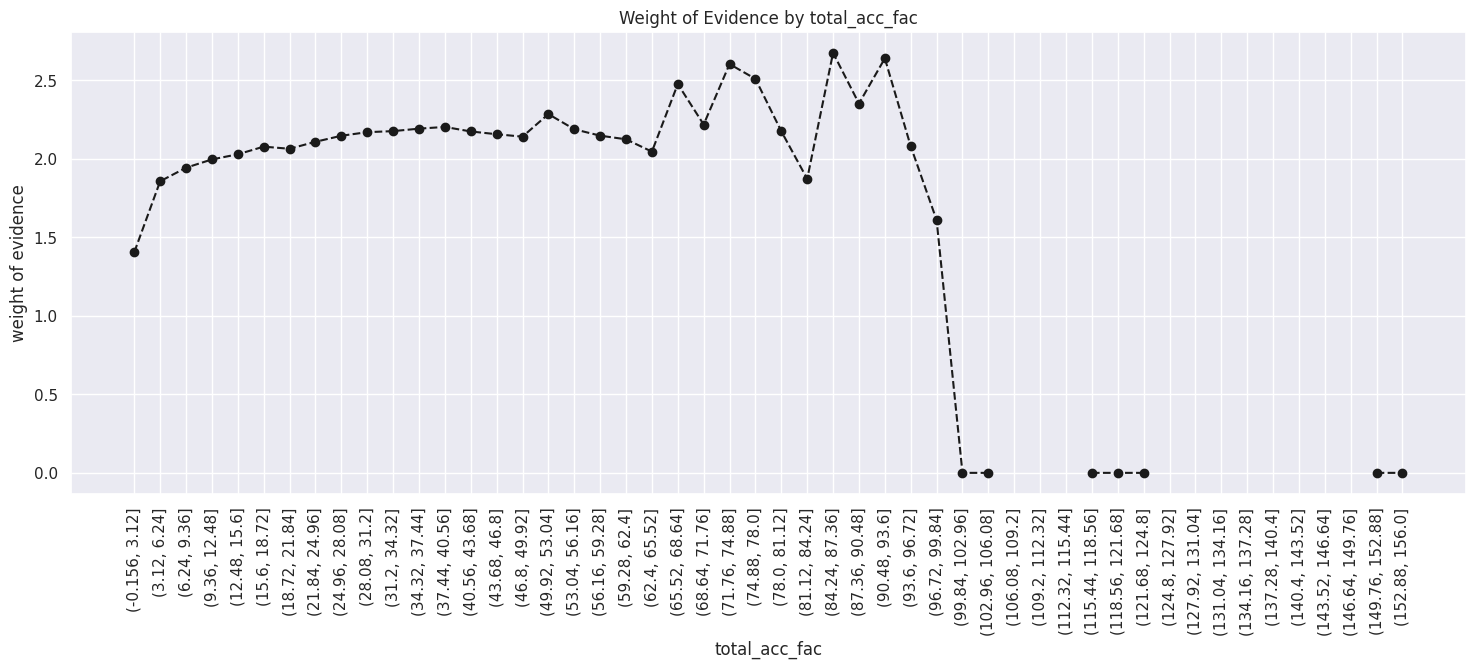

In [145]:
#plot the woe_plot
plot_by_woe(df_temp_pub_tot_acc, 90)

In [146]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_acc:<=0.0-3.12']= np.where(((df_inputs_prepr['total_acc'] >= 0) & (df_inputs_prepr['total_acc']< 3.12)),1,0)
df_inputs_prepr['total_acc:3.12-15.6']= np.where(((df_inputs_prepr['total_acc'] >= 3.12) & (df_inputs_prepr['total_acc']< 15.6)),1,0)
df_inputs_prepr['total_acc:15.6-49.92']= np.where(((df_inputs_prepr['total_acc'] >= 15.6) & (df_inputs_prepr['total_acc']< 49.92)),1,0)
df_inputs_prepr['total_acc:49.92-65.52']= np.where(((df_inputs_prepr['total_acc'] >= 49.92) & (df_inputs_prepr['total_acc']< 65.52)),1,0)
df_inputs_prepr['total_acc:65.52-81.12']= np.where(((df_inputs_prepr['total_acc'] >= 65.52) & (df_inputs_prepr['total_acc']< 81.12)),1,0)
df_inputs_prepr['total_acc:81.12-99.84']= np.where(((df_inputs_prepr['total_acc'] >= 81.12) & (df_inputs_prepr['total_acc']< 99.84)),1,0)
df_inputs_prepr['total_acc:>99.84'] = np.where((df_inputs_prepr['total_acc'] >= 99.84),1,0)

In [147]:
#convert the 'acc_now_delinq' into float type and check it's value
df_inputs_prepr['acc_now_delinq']= df_inputs_prepr['acc_now_delinq'].astype(float)
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 5., 4.])

In [148]:
#apply the woe_continuos function
df_temp_pub_acc_deliq=woe_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_temp_pub_acc_deliq.head(10)

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371669,0.890911,0.996357,331124.0,40545.0,0.996347,0.121999,2.100080,NaN,NaN,1.843059
1,1.0,1272,0.893082,0.003410,1136.0,136.0,0.003418,0.000409,2.122614,0.002171,0.022533,1.843059
2,2.0,74,0.918919,0.000198,68.0,6.0,0.000205,0.000018,2.427748,0.025837,0.305135,1.843059
3,3.0,9,0.777778,0.000024,7.0,2.0,0.000021,0.000006,1.252763,0.141141,1.174985,1.843059
4,4.0,2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,0.000000,0.222222,1.252763,1.843059
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000003,0.000000,0.500000,0.000000,1.843059


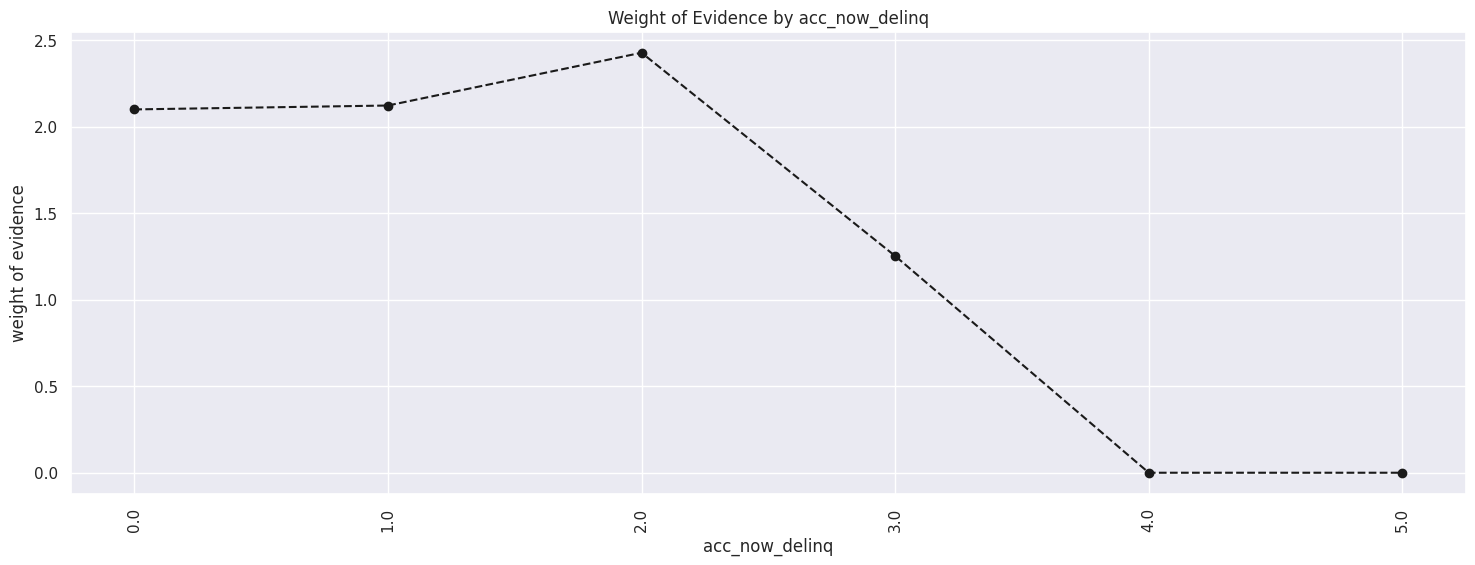

In [149]:
#plot the woe_plot
plot_by_woe(df_temp_pub_acc_deliq, 90)

In [150]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other


df_inputs_prepr['acc_now_delinq:0-1']= np.where(((df_inputs_prepr['acc_now_delinq'] >= 0) & (df_inputs_prepr['acc_now_delinq']<= 1)),1,0)
df_inputs_prepr['acc_now_delinq:1-2']= np.where(((df_inputs_prepr['acc_now_delinq'] > 1) & (df_inputs_prepr['acc_now_delinq']<= 2)),1,0)
df_inputs_prepr['acc_now_delinq:2-3']= np.where(((df_inputs_prepr['acc_now_delinq'] > 2) & (df_inputs_prepr['acc_now_delinq']<= 3)),1,0)
df_inputs_prepr['acc_now_delinq:>3']= np.where((df_inputs_prepr['acc_now_delinq'] > 3),1,0)


In [151]:
#For 'total_rev_hi_lim' column we'll analyse values under 80000 for this analysis(to lower the no. of records)
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]
df_inputs_prepr_temp.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_acc:3.12-15.6,total_acc:15.6-49.92,total_acc:49.92-65.52,total_acc:65.52-81.12,total_acc:81.12-99.84,total_acc:>99.84,acc_now_delinq:0-1,acc_now_delinq:1-2,acc_now_delinq:2-3,acc_now_delinq:>3
403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,B3,...,0,1,0,0,0,0,1,0,0,0
241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,C1,...,1,0,0,0,0,0,1,0,0,0
15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,C2,...,1,0,0,0,0,0,1,0,0,0
320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,C3,...,0,1,0,0,0,0,1,0,0,0
299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,B4,...,0,1,0,0,0,0,1,0,0,0


In [152]:
#apply the cut and woe_continuos function
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp_tot_rev_hi = woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_temp_tot_rev_hi.head(10)

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",2116,0.844045,0.005899,1786.0,330.0,0.005601,0.001035,1.688641,NaN,NaN,1.836967
1,"(1600.0, 3200.0]",6649,0.862385,0.018535,5734.0,915.0,0.017982,0.002869,1.835245,0.018340,0.146603,1.836967
2,"(3200.0, 4800.0]",10147,0.873953,0.028286,8868.0,1279.0,0.027810,0.004011,1.936371,0.011568,0.101126,1.836967
3,"(4800.0, 6400.0]",16254,0.872339,0.045309,14179.0,2075.0,0.044465,0.006507,1.921801,0.001614,0.014570,1.836967
4,"(6400.0, 8000.0]",17701,0.876956,0.049343,15523.0,2178.0,0.048680,0.006830,1.963916,0.004617,0.042115,1.836967
5,"(8000.0, 9600.0]",16454,0.879543,0.045867,14472.0,1982.0,0.045384,0.006216,1.988109,0.002587,0.024194,1.836967
6,"(9600.0, 11200.0]",20369,0.878295,0.056780,17890.0,2479.0,0.056103,0.007774,1.976387,0.001248,0.011723,1.836967
7,"(11200.0, 12800.0]",19475,0.880000,0.054288,17138.0,2337.0,0.053745,0.007329,1.992430,0.001705,0.016044,1.836967
8,"(12800.0, 14400.0]",17474,0.883999,0.048710,15447.0,2027.0,0.048442,0.006357,2.030858,0.003999,0.038428,1.836967
9,"(14400.0, 16000.0]",19694,0.872804,0.054898,17189.0,2505.0,0.053904,0.007856,1.925981,0.011195,0.104877,1.836967


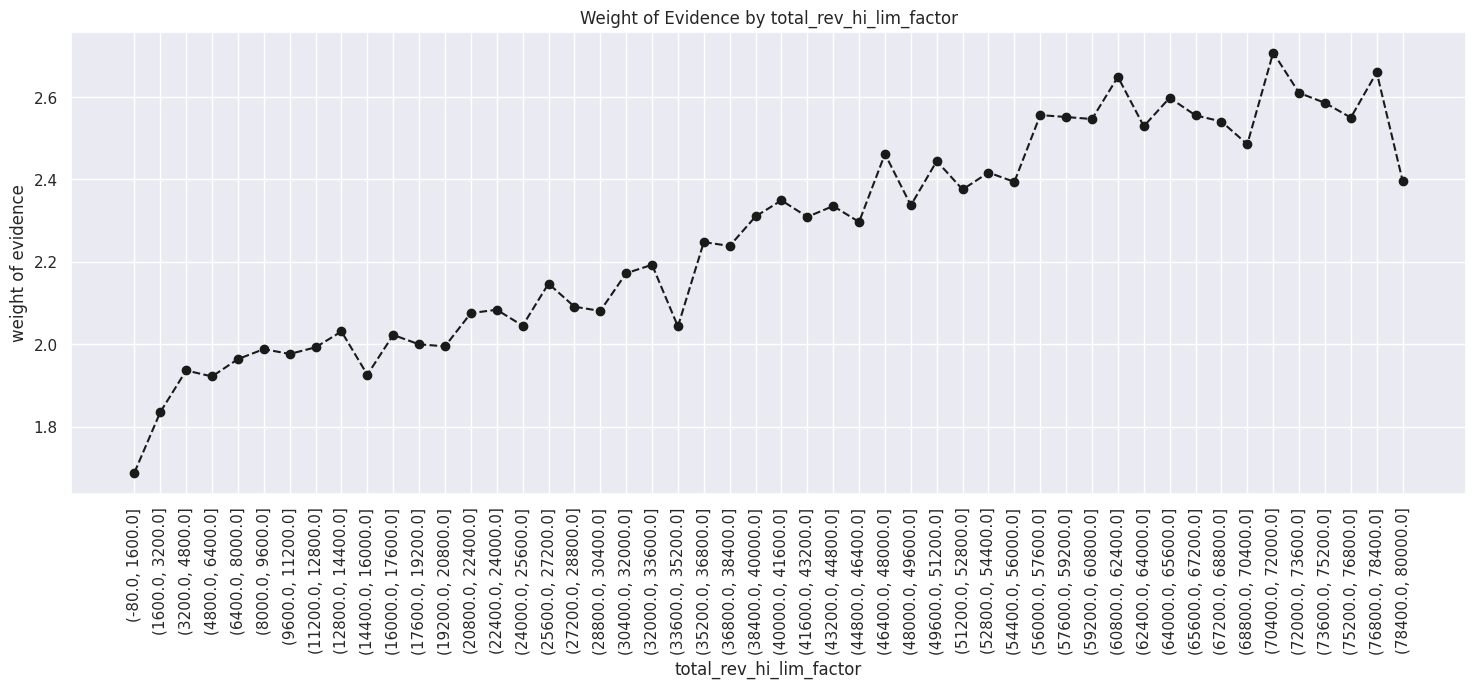

In [153]:
#plot the woe_plot
plot_by_woe(df_temp_tot_rev_hi, 90)

In [154]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_rev_hi_lim:<6.4k']= np.where((df_inputs_prepr['total_rev_hi_lim'] < 6400 ), 1,0)
df_inputs_prepr['total_rev_hi_lim:6.4k_12.8k'] = np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 6400 ) & (df_inputs_prepr['total_rev_hi_lim']< 12800)),1,0)
df_inputs_prepr['total_rev_hi_lim:12.8k_20.8k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 12800 ) & (df_inputs_prepr['total_rev_hi_lim']< 20800)),1,0)
df_inputs_prepr['total_rev_hi_lim:20.8k_30.4k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 20800) & (df_inputs_prepr['total_rev_hi_lim']< 30400)),1,0)
df_inputs_prepr['total_rev_hi_lim:30.4k_35.2k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 30400 ) & (df_inputs_prepr['total_rev_hi_lim']< 35200)),1,0)
df_inputs_prepr['total_rev_hi_lim:35.2k_46.4k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 35200 ) & (df_inputs_prepr['total_rev_hi_lim']< 46400)),1,0)
df_inputs_prepr['total_rev_hi_lim:46.4k_56k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 46400 ) & (df_inputs_prepr['total_rev_hi_lim']< 56000)),1,0)
df_inputs_prepr['total_rev_hi_lim:56k_70.4k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 56000) & (df_inputs_prepr['total_rev_hi_lim']< 70400)),1,0)
df_inputs_prepr['total_rev_hi_lim:70.4k_78.4k']= np.where(((df_inputs_prepr['total_rev_hi_lim'] >= 70400 ) & (df_inputs_prepr['total_rev_hi_lim']< 78400)),1,0)
df_inputs_prepr['total_rev_hi_lim:>78.4k']= np.where((df_inputs_prepr['total_rev_hi_lim'] >= 78400 ) ,1,0)


In [155]:
#check the no. of unique values in 'annual_inc'
df_inputs_prepr['annual_inc'].nunique()

26843

In [156]:
#apply the cut and woe_contionus function on 'annual_inc'

df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp_annual_inc=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp_annual_inc.head(10)

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5548.499, 76340.99]",244682,0.877600,0.655935,214733.0,29949.0,0.646128,0.090116,1.969899,NaN,NaN,1.865124
1,"(76340.99, 150785.98]",111859,0.914768,0.299868,102325.0,9534.0,0.307894,0.028688,2.373290,0.037167,0.403390,1.865124
2,"(150785.98, 225230.97]",12000,0.927000,0.032169,11124.0,876.0,0.033472,0.002636,2.541494,0.012232,0.168204,1.865124
3,"(225230.97, 299675.96]",2425,0.922062,0.006501,2236.0,189.0,0.006728,0.000569,2.470697,0.004938,0.070797,1.865124
4,"(299675.96, 374120.95]",1080,0.932407,0.002895,1007.0,73.0,0.003030,0.000220,2.624271,0.010346,0.153575,1.865124
5,"(374120.95, 448565.94]",390,0.930769,0.001045,363.0,27.0,0.001092,0.000081,2.598566,0.001638,0.025705,1.865124
6,"(448565.94, 523010.93]",257,0.949416,0.000689,244.0,13.0,0.000734,0.000039,2.932219,0.018647,0.333653,1.865124
7,"(523010.93, 597455.92]",72,0.888889,0.000193,64.0,8.0,0.000193,0.000024,2.079442,0.060527,0.852777,1.865124
8,"(597455.92, 671900.91]",86,0.895349,0.000231,77.0,9.0,0.000232,0.000027,2.146581,0.006460,0.067139,1.865124
9,"(671900.91, 746345.9]",35,0.885714,0.000094,31.0,4.0,0.000093,0.000012,2.047693,0.009635,0.098888,1.865124


As we can see higher values in annual_inc has very less observation so we will take only those annual income which are less than 150000

In [157]:
#take only those observations which are less than 140000 for this analysis
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 150000,:]

In [158]:
#apply the cut and woe_contionus function on 'annual_inc'
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp_annual_inc = woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp_annual_inc.head(10)

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1747.896, 4858.08]",19,0.736842,0.000053,14.0,5.0,0.000044,0.000016,1.029619,NaN,NaN,1.852302
1,"(4858.08, 7820.16]",46,0.826087,0.000129,38.0,8.0,0.000120,0.000025,1.558145,0.089245,0.528525,1.852302
2,"(7820.16, 10782.24]",346,0.832370,0.000970,288.0,58.0,0.000908,0.000183,1.602517,0.006283,0.044373,1.852302
3,"(10782.24, 13744.32]",691,0.840810,0.001938,581.0,110.0,0.001833,0.000347,1.664270,0.008440,0.061753,1.852302
4,"(13744.32, 16706.4]",1389,0.851692,0.003896,1183.0,206.0,0.003731,0.000650,1.747933,0.010881,0.083662,1.852302
5,"(16706.4, 19668.48]",1865,0.850402,0.005231,1586.0,279.0,0.005003,0.000880,1.737759,0.001290,0.010174,1.852302
6,"(19668.48, 22630.56]",3585,0.842678,0.010056,3021.0,564.0,0.009529,0.001779,1.678289,0.007724,0.059470,1.852302
7,"(22630.56, 25592.64]",6407,0.856407,0.017971,5487.0,920.0,0.017307,0.002902,1.785763,0.013729,0.107474,1.852302
8,"(25592.64, 28554.72]",5741,0.848110,0.016103,4869.0,872.0,0.015358,0.002750,1.719854,0.008297,0.065909,1.852302
9,"(28554.72, 31516.8]",10265,0.861568,0.028792,8844.0,1421.0,0.027896,0.004482,1.828378,0.013458,0.108524,1.852302


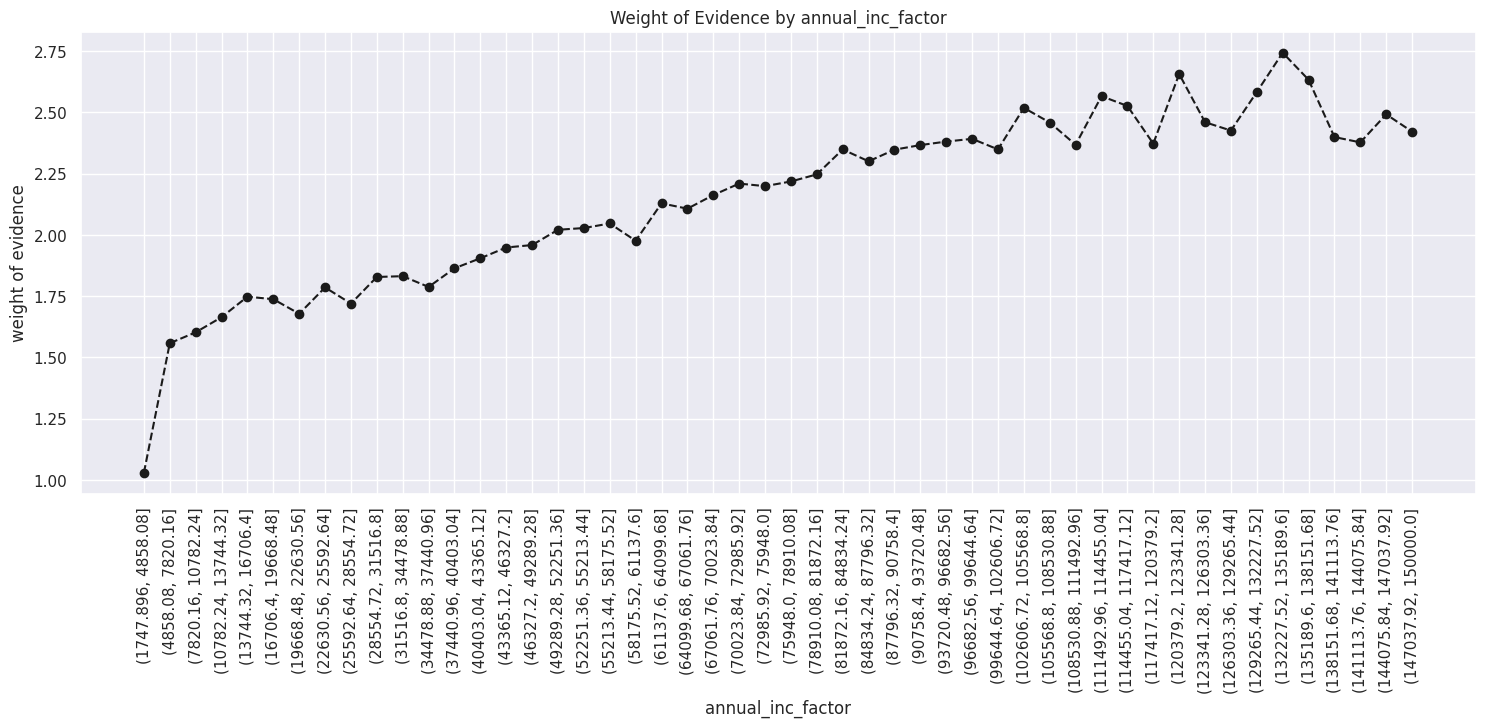

In [159]:
#plot the woe_plot
plot_by_woe(df_temp_annual_inc, 90)

In [160]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['annual_inc:<8k']= np.where((df_inputs_prepr['annual_inc'] < 8000 ),1,0)
df_inputs_prepr['annual_inc:8k-30k']= np.where(((df_inputs_prepr['annual_inc'] >= 8000 ) & (df_inputs_prepr['annual_inc']< 30000)),1,0)
df_inputs_prepr['annual_inc:30k-40k']= np.where(((df_inputs_prepr['annual_inc'] >= 30000 ) & (df_inputs_prepr['annual_inc']< 40000)),1,0)
df_inputs_prepr['annual_inc:40k-50k']= np.where(((df_inputs_prepr['annual_inc'] >= 40000 ) & (df_inputs_prepr['annual_inc']< 50000)),1,0)
df_inputs_prepr['annual_inc:50k-60k']= np.where(((df_inputs_prepr['annual_inc'] >= 50000 ) & (df_inputs_prepr['annual_inc']< 60000)),1,0)
df_inputs_prepr['annual_inc:60k-70k']= np.where(((df_inputs_prepr['annual_inc'] >= 60000 ) & (df_inputs_prepr['annual_inc']< 70000)),1,0)
df_inputs_prepr['annual_inc:70k-80k']= np.where(((df_inputs_prepr['annual_inc'] >= 70000 ) & (df_inputs_prepr['annual_inc']< 80000)),1,0)
df_inputs_prepr['annual_inc:80k-90k']= np.where(((df_inputs_prepr['annual_inc'] >= 80000 ) & (df_inputs_prepr['annual_inc']< 90000)),1,0)
df_inputs_prepr['annual_inc:90k-100k']= np.where(((df_inputs_prepr['annual_inc'] >= 90000 ) & (df_inputs_prepr['annual_inc']< 100000)),1,0)
df_inputs_prepr['annual_inc:100k-120k']= np.where(((df_inputs_prepr['annual_inc'] >= 100000 ) & (df_inputs_prepr['annual_inc']< 120000)),1,0)
df_inputs_prepr['annual_inc:120k-140k']= np.where(((df_inputs_prepr['annual_inc'] >= 120000 ) & (df_inputs_prepr['annual_inc']< 140000)),1,0)
df_inputs_prepr['annual_inc:>140k']= np.where((df_inputs_prepr['annual_inc'] >= 140000 ) ,1,0)

In [161]:
df_inputs_prepr['mths_since_last_delinq'].unique()

array([ nan,  15.,  56.,  73.,  72.,   2.,  26.,  23.,  12.,  21.,  58.,
        76.,  33.,  63.,   3.,  59.,  34.,  14.,  45.,   6.,  35.,  19.,
         7.,  13.,  49.,  48.,  20.,  32.,  77.,  31.,  25.,  42.,  43.,
        11.,   5.,  17.,  36.,  18.,  28.,   0.,  44.,  60.,  39.,  16.,
         1.,  53.,  68.,  40.,  67.,  37.,   8.,  55.,  41.,  30.,  54.,
        38.,  65.,  46.,  50.,  78.,  74.,  82.,  10.,  47.,  27.,  57.,
         9.,  51.,  80.,  29.,  66.,  22.,  64.,  62.,  83.,  81.,  24.,
        69.,  61.,   4.,  70.,  52.,  71.,  79.,  75., 133.,  84., 109.,
       180.,  87., 104.,  90.,  89.,  92.,  93., 102.,  99.,  86.,  95.,
        85.,  97., 111., 188., 114., 108.,  94.,  96., 124., 151., 115.,
       101.,  88., 126., 103.,  91., 118., 122., 106., 141., 110., 131.,
       135., 107., 113., 105., 130., 134., 149., 100.,  98., 170., 120.,
       119., 156., 152., 140., 148., 129., 136., 159., 127.])

In [162]:
#'mths_since_last_delinq' has null values so take only the notnull values and check the unique values for it
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq'].unique()

#apply the cut and woe_continuos function on 'mths_since_last_delinq'
df_inputs_prepr['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp_mon_lst_deliq = woe_continuous(df_inputs_prepr,'mths_since_last_delinq_factor',df_targets_prepr)
df_temp_mon_lst_deliq.head(10)

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5274,0.872772,0.030527,4603.0,671.0,0.029855,0.004352,1.925694,NaN,NaN,1.862553
1,"(3.76, 7.52]",11066,0.889391,0.064052,9842.0,1224.0,0.063835,0.007939,2.084535,0.016619,0.158840,1.862553
2,"(7.52, 11.28]",13303,0.891829,0.077001,11864.0,1439.0,0.076950,0.009333,2.109560,0.002438,0.025025,1.862553
3,"(11.28, 15.04]",13313,0.888380,0.077058,11827.0,1486.0,0.076710,0.009638,2.074297,0.003449,0.035263,1.862553
4,"(15.04, 18.8]",9296,0.894363,0.053807,8314.0,982.0,0.053924,0.006369,2.136105,0.005983,0.061808,1.862553
5,"(18.8, 22.56]",11661,0.892719,0.067496,10410.0,1251.0,0.067519,0.008114,2.118824,0.001644,0.017281,1.862553
6,"(22.56, 26.32]",10868,0.898233,0.062906,9762.0,1106.0,0.063316,0.007173,2.177747,0.005514,0.058924,1.862553
7,"(26.32, 30.08]",10567,0.893536,0.061164,9442.0,1125.0,0.061241,0.007297,2.127385,0.004697,0.050363,1.862553
8,"(30.08, 33.84]",7598,0.900895,0.043979,6845.0,753.0,0.044396,0.004884,2.207209,0.007358,0.079824,1.862553
9,"(33.84, 37.6]",9659,0.898230,0.055908,8676.0,983.0,0.056272,0.006376,2.177707,0.002665,0.029502,1.862553


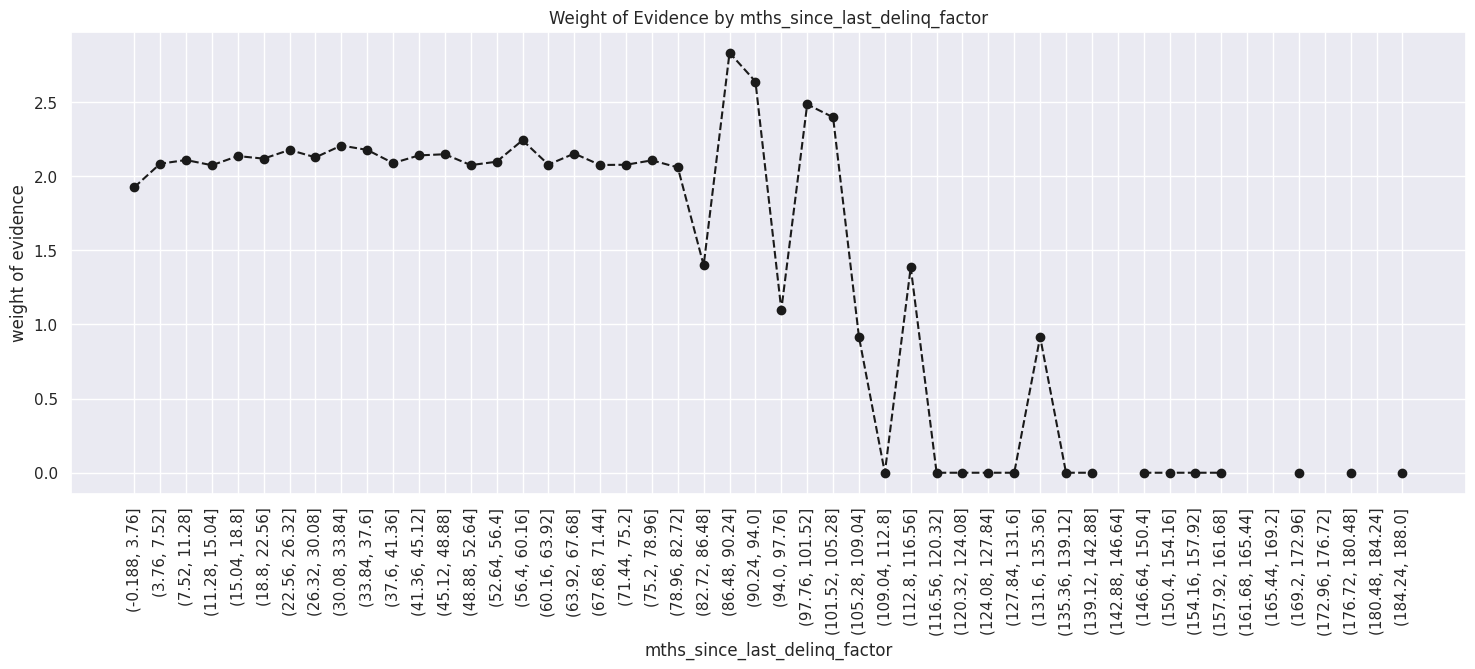

In [163]:
#plot the woe_plot
plot_by_woe(df_temp_mon_lst_deliq, 90)

In [164]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
# as above we had taken only not null values to evaluate WoE, we'll categorise the null values as missing

df_inputs_prepr['mths_since_last_delinq:Missing']= np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3']= np.where(((df_inputs_prepr['mths_since_last_delinq'] >= 0.0 ) & (df_inputs_prepr['mths_since_last_delinq']<= 3)),1,0)
df_inputs_prepr['mths_since_last_delinq:3-80']= np.where(((df_inputs_prepr['mths_since_last_delinq'] > 3 ) & (df_inputs_prepr['mths_since_last_delinq']<= 80)),1,0)
df_inputs_prepr['mths_since_last_delinq:80-90']= np.where(((df_inputs_prepr['mths_since_last_delinq'] > 80 ) & (df_inputs_prepr['mths_since_last_delinq']<= 90)),1,0)
df_inputs_prepr['mths_since_last_delinq:90-105']= np.where(((df_inputs_prepr['mths_since_last_delinq'] > 90 ) & (df_inputs_prepr['mths_since_last_delinq']<= 105)),1,0)
df_inputs_prepr['mths_since_last_delinq:105-116']= np.where(((df_inputs_prepr['mths_since_last_delinq'] > 105 ) & (df_inputs_prepr['mths_since_last_delinq']<= 116)),1,0)
df_inputs_prepr['mths_since_last_delinq:>=116']=np.where((df_inputs_prepr['mths_since_last_delinq'] > 116 ) ,1,0)

In [165]:
#check the no. of unique values for 'dti' column
df_inputs_prepr['dti'].nunique()

3997

In [166]:
#apply the cut function on 'dti_factor'
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

In [167]:
#apply the woe_continuos function
df_temp_dti = woe_continuous(df_inputs_prepr,'dti_factor',df_targets_prepr)
df_temp_dti.head(10)

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1542,0.891699,0.004134,1375.0,167.0,0.004137,0.000503,2.108215,NaN,NaN,1.858541
1,"(0.8, 1.6]",1986,0.896777,0.005324,1781.0,205.0,0.005359,0.000617,2.161920,0.005078,0.053705,1.858541
2,"(1.6, 2.399]",2506,0.906225,0.006718,2271.0,235.0,0.006833,0.000707,2.268390,0.009448,0.106470,1.858541
3,"(2.399, 3.199]",3228,0.908922,0.008654,2934.0,294.0,0.008828,0.000885,2.300542,0.002697,0.032152,1.858541
4,"(3.199, 3.999]",4124,0.908099,0.011055,3745.0,379.0,0.011269,0.001140,2.290641,0.000823,0.009902,1.858541
5,"(3.999, 4.799]",5065,0.917275,0.013578,4646.0,419.0,0.013980,0.001261,2.405891,0.009176,0.115250,1.858541
6,"(4.799, 5.599]",6063,0.913079,0.016253,5536.0,527.0,0.016658,0.001586,2.351827,0.004196,0.054064,1.858541
7,"(5.599, 6.398]",6779,0.913114,0.018173,6190.0,589.0,0.018626,0.001772,2.352264,0.000035,0.000437,1.858541
8,"(6.398, 7.198]",7668,0.914189,0.020556,7010.0,658.0,0.021093,0.001980,2.365888,0.001075,0.013624,1.858541
9,"(7.198, 7.998]",8747,0.914485,0.023449,7999.0,748.0,0.024069,0.002251,2.369669,0.000296,0.003781,1.858541


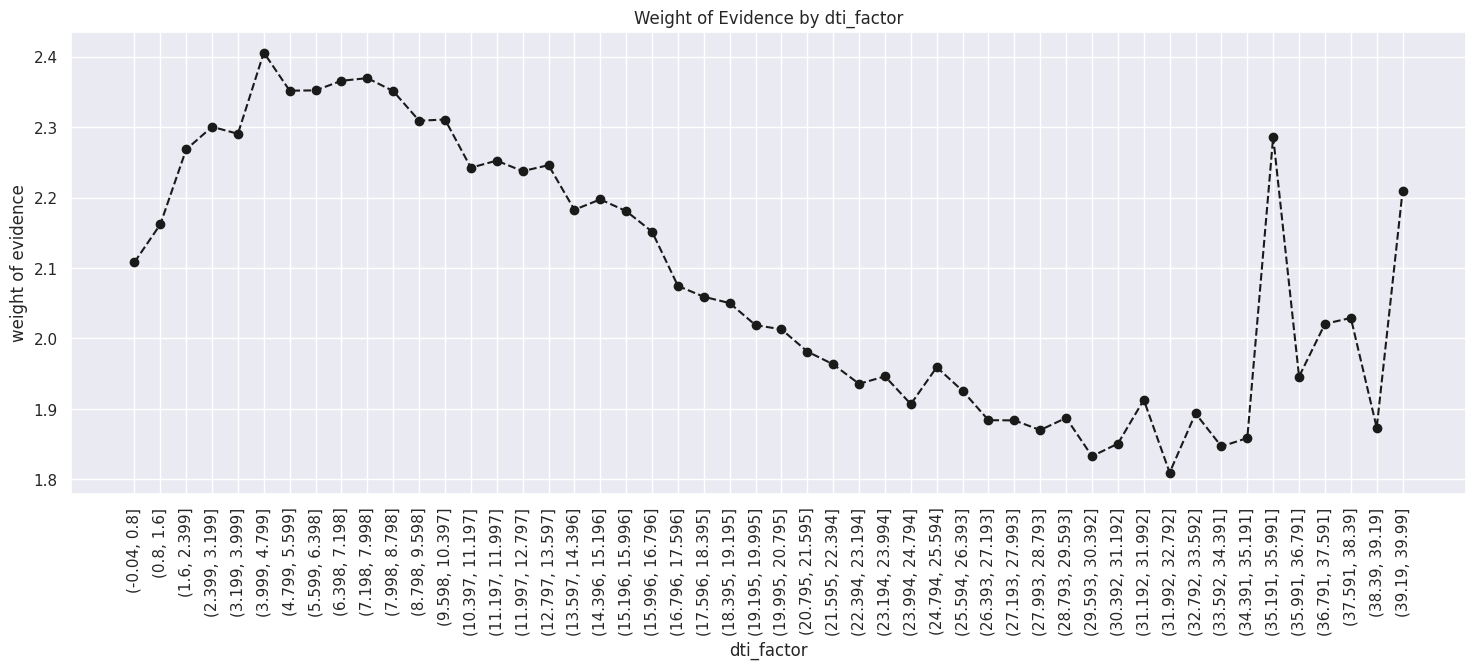

In [168]:
#plot the woe_plot
plot_by_woe(df_temp_dti, 90)

In [169]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['dti:<2'] = np.where((df_inputs_prepr['dti'] < 2),1,0)
df_inputs_prepr['dti:2-4']= np.where(((df_inputs_prepr['dti'] >= 2 ) & (df_inputs_prepr['dti'] < 4)),1,0)
df_inputs_prepr['dti:4-10']= np.where(((df_inputs_prepr['dti'] >= 4 ) & (df_inputs_prepr['dti'] < 10)),1,0)
df_inputs_prepr['dti:10-15']= np.where(((df_inputs_prepr['dti'] >= 10 ) & (df_inputs_prepr['dti'] < 15)),1,0)
df_inputs_prepr['dti:15-20']= np.where(((df_inputs_prepr['dti'] >= 15 ) & (df_inputs_prepr['dti'] < 20)),1,0)
df_inputs_prepr['dti:20-25']= np.where(((df_inputs_prepr['dti'] >= 20 ) & (df_inputs_prepr['dti'] < 25)),1,0)
df_inputs_prepr['dti:25-30']= np.where(((df_inputs_prepr['dti'] >= 25 ) & (df_inputs_prepr['dti'] < 30)),1,0)
df_inputs_prepr['dti:30-35']= np.where(((df_inputs_prepr['dti'] >= 30 ) & (df_inputs_prepr['dti'] < 35)),1,0)
df_inputs_prepr['dti:35-40']= np.where(((df_inputs_prepr['dti'] >= 35 ) & (df_inputs_prepr['dti'] < 40)),1,0)
df_inputs_prepr['dti:>40']= np.where((df_inputs_prepr['dti'] >= 40 ),1,0)

In [170]:
#'mths_since_last_record' has null values so take only the notnull values
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record'].unique()

#apply the cut function
#df_inputs_prepr_temp['mths_since_last_record'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


array([ 81.,  49., 109.,  48.,  55.,  41.,  47., 101., 108.,  70.,  94.,
        67.,  72.,  77.,   0.,  80., 119.,  62., 116.,  98.,  91., 111.,
        56.,   7., 104.,  88.,  63.,  40.,  18.,  10., 106.,  61.,  87.,
        46.,  71.,   5.,  26.,  31.,  95., 105.,  37.,  92.,  28.,  84.,
        90.,  66., 110., 100.,  76.,  14., 113.,  96.,  65.,  52.,  36.,
        93.,  79.,  74.,  32.,  82.,  29.,  97., 107.,  11.,  83., 112.,
        58.,  43.,  69.,  60.,  35.,  64.,  54.,  27.,  78., 118.,  75.,
        16.,  33.,  89.,  59., 103.,  34., 115.,  51., 102., 117.,   9.,
       114.,  73.,  57.,  53.,  23.,  68.,  50.,  99.,   8.,  42.,  45.,
        22.,  44.,  85.,  25.,  12.,  17.,  30.,  39.,  86.,   6.,  20.,
        38.,  24.,   3.,  21.,  19.,   4.,  15.,  13.,   1.,   2., 121.,
       120., 129.])

In [171]:
#apply the cut function and woe_continuos function
df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)
df_temp_mon_lst_record = woe_continuous(df_inputs_prepr,'mths_since_last_record_factor',df_targets_prepr)
df_temp_mon_lst_record.head(10)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1065,0.762441,0.02130,812.0,253.0,0.018153,0.005656,1.166111,NaN,NaN,1.929663
1,"(2.58, 5.16]",124,0.887097,0.00248,110.0,14.0,0.002459,0.000313,2.061423,0.124655,0.895312,1.929663
2,"(5.16, 7.74]",123,0.934959,0.00246,115.0,8.0,0.002571,0.000179,2.665491,0.047863,0.604068,1.929663
3,"(7.74, 10.32]",245,0.918367,0.00490,225.0,20.0,0.005030,0.000447,2.420368,0.016592,0.245122,1.929663
4,"(10.32, 12.9]",199,0.874372,0.00398,174.0,25.0,0.003890,0.000559,1.940179,0.043995,0.480189,1.929663
5,"(12.9, 15.48]",294,0.901361,0.00588,265.0,29.0,0.005924,0.000648,2.212434,0.026989,0.272255,1.929663
6,"(15.48, 18.06]",328,0.899390,0.00656,295.0,33.0,0.006595,0.000738,2.190468,0.001970,0.021966,1.929663
7,"(18.06, 20.64]",239,0.920502,0.00478,220.0,19.0,0.004918,0.000425,2.449189,0.021112,0.258721,1.929663
8,"(20.64, 23.22]",437,0.910755,0.00874,398.0,39.0,0.008897,0.000872,2.322890,0.009747,0.126298,1.929663
9,"(23.22, 25.8]",331,0.912387,0.00662,302.0,29.0,0.006751,0.000648,2.343131,0.001632,0.020241,1.929663


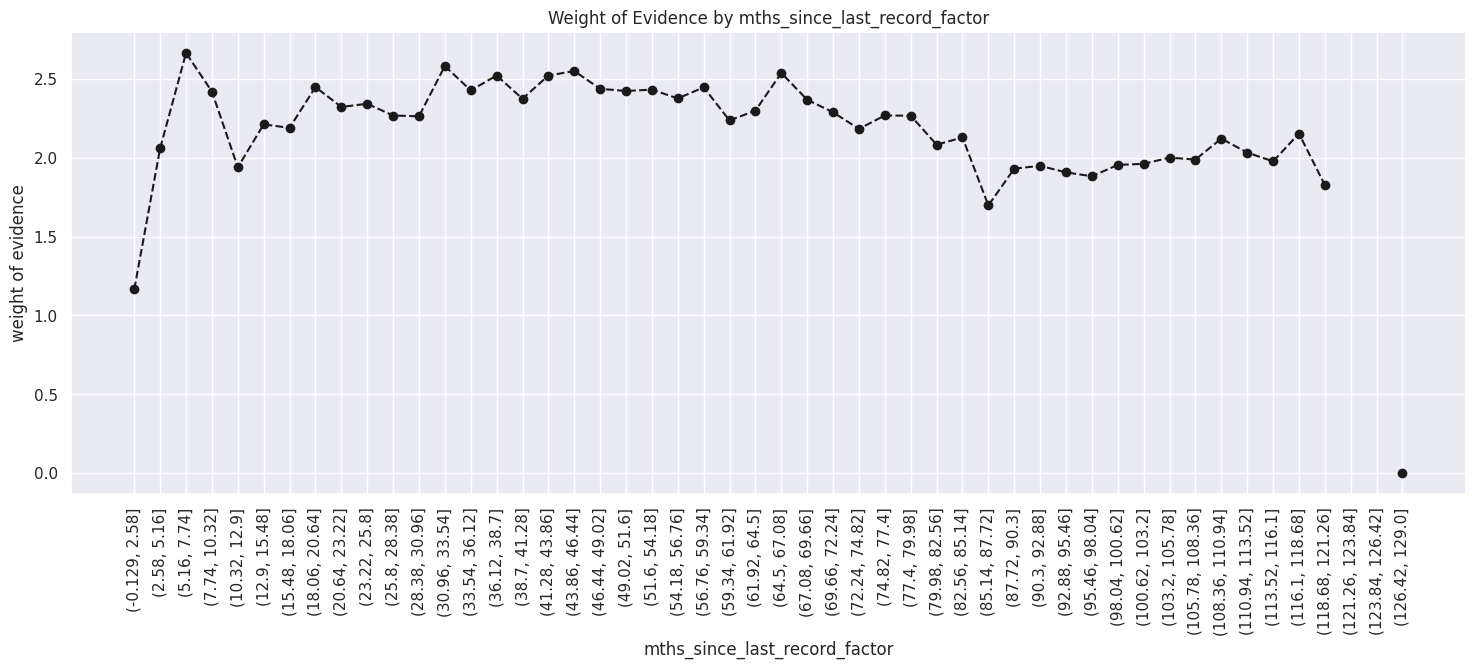

In [172]:
#plot the woe_plot
plot_by_woe(df_temp_mon_lst_record, 90)

In [184]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_record:Missing']= np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-3']= np.where(((df_inputs_prepr['mths_since_last_record'] >= 0 ) & (df_inputs_prepr['mths_since_last_record'] < 3)),1,0)
df_inputs_prepr['mths_since_last_record:3-85']= np.where(((df_inputs_prepr['mths_since_last_record'] >= 3 ) & (df_inputs_prepr['mths_since_last_record'] < 85)),1,0)
df_inputs_prepr['mths_since_last_record:85-120']= np.where(((df_inputs_prepr['mths_since_last_record'] >= 85 ) & (df_inputs_prepr['mths_since_last_record'] < 120)),1,0)
df_inputs_prepr['mths_since_last_record:>=120']=np.where((df_inputs_prepr['mths_since_last_record'] >= 120 ) ,1,0)


In [185]:
#assigning the dataframe into a new variable
X_train= df_inputs_prepr

In [ ]:
#import train-test split
from sklearn.model_selection import train_test_split

In [195]:
#applying the train_test split
X_train,X_test,y_train,y_test=train_test_split(df_inputs_prepr, df_targets_prepr,test_size=0.2,random_state=1)

In [196]:
#check the shape of training and testing dataset:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(298422, 351)

(298422,)

(74606, 351)

(74606,)

In [197]:
#import the preprosess dataframe into a new csv file

X_train.to_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_inputs_train.csv')
y_train.to_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_targets_train.csv')

X_test.to_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_inputs_test.csv')
y_test.to_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_targets_test.csv')

##### below line of codes are for checking and validation of data in-the-middle-of-analysis purposes

In [ ]:
#code to find column name based on string values
#[col for col in df_inputs_prepr.columns if 'since_issued_date' in col]
#df_inputs_prepr.filter(regex='(earliest_cr_line)')

In [ ]:
#check the values of factor column w.r.t. it's value column
#df_inputs_prepr.groupby('mths_since_last_record_factor')[['mths_since_last_record_factor', 'mths_since_last_record']].max()
#df_inputs_prepr.groupby('mths_since_last_record_factor')[['mths_since_last_record_factor', 'mths_since_last_record']].max()

,mths_since_last_record_factor,mths_since_last_record
mths_since_last_record_factor,,
"(-0.129, 2.58]","(-0.129, 2.58]",2.0
"(2.58, 5.16]","(2.58, 5.16]",5.0
"(5.16, 7.74]","(5.16, 7.74]",7.0
"(7.74, 10.32]","(7.74, 10.32]",10.0
"(10.32, 12.9]","(10.32, 12.9]",12.0
"(12.9, 15.48]","(12.9, 15.48]",15.0
"(15.48, 18.06]","(15.48, 18.06]",18.0
"(18.06, 20.64]","(18.06, 20.64]",20.0
"(20.64, 23.22]","(20.64, 23.22]",23.0
